## Purpose:

#### Generate report style infographic --

This notebook is intended to be a 'summary' report guide. It organizes the elements present in preceding notebooks and generates summary maps and text

In [2]:
import os
import sys

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("The current Working Directory is:", current_directory)

# Get the path to the base directory (VIEWS_FAO_index)
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(f'The base directory will be set to: {base_dir}')

# Add the base directory to sys.path
sys.path.insert(0, base_dir)

The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index


In [3]:
# delte this is temporary--
from src.utils.functions_for_graphics.individual_graphics.map_helper.manipulate_tables_for_mapping import calculate_histogram_data


from src.utils.universal_functions.setup.generate_base_file import give_primary_frame

from src.utils.functions_for_return_periods.insurance_products_for_RP import insurance_files

from src.utils.universal_functions.setup.build_directory import float_to_custom_string, ensure_directory_exists


#Functions for graphics:
from src.utils.functions_for_graphics.individual_graphics.map_helper.manipulate_tables_for_mapping import clean_info_dataframe, query_and_sort_annual_table, provide_values_at_input_return_periods, retrieve_geodataframe, define_year_to_map, query_geodataframe

from src.utils.functions_for_graphics.individual_graphics.image_annual_returnperiod_table import image_save_returnperiodtable
from src.utils.functions_for_graphics.individual_graphics.image_annual_returnperiod_lineplot import plot_histogram_with_lineplot_4
from src.utils.functions_for_graphics.individual_graphics.image_annual_summary_table import plot_and_colorize_annual_table
from src.utils.functions_for_graphics.individual_graphics.image_map_for_Ei import image_save_map_E_i

#Mapping structure:
from src.utils.functions_for_graphics.layout_formats.event_cat_rp import map_event_cat_rp
from src.utils.functions_for_graphics.layout_formats.summary_of_top_years import map_top_years
#from src.utils.functions_for_graphics.layout_formats.Layout_single_method_option1 import mapped_option1


#functions for all methods
from src.utils.universal_functions.FAO_table_formatting.generate_output_tables import generate_and_give_info_dataframe, append_return_periods_to_annual_table

The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The curren

import historic data

In [4]:
data = give_primary_frame('Fatalities_fao_pgm', 'cm_properties', 1988, 2021)

100%|██████████| 40.0M/40.0M [00:02<00:00, 19.9MB/s]


Queryset Fatalities_fao_pgm read successfully 
Queryset cm_properties read successfully 


/Users/gbenz/miniforge3/envs/viewser/lib/python3.11/site-packages/ingester3/scratch.py:31: UserWarning: No database connection! Will try to use cache for read-only ops as much as I can
  warnings.warn("No database connection! Will try to use cache for read-only ops as much as I can")


['month_id', 'pg_id', 'country_name', 'C_start_year', 'C_end_year', 'pop_gpw_sum', 'ged_sb', 'ged_ns', 'ged_os', 'year', 'fatalities_sum', 'country_id']


import out of sample data

In [5]:
oos_data = give_primary_frame('Fatalities_fao_pgm', 'cm_properties', 2021, 2024)

100%|██████████| 40.0M/40.0M [00:02<00:00, 19.7MB/s]


Queryset Fatalities_fao_pgm read successfully 
Queryset cm_properties read successfully 


/Users/gbenz/miniforge3/envs/viewser/lib/python3.11/site-packages/ingester3/scratch.py:31: UserWarning: No database connection! Will try to use cache for read-only ops as much as I can
  warnings.warn("No database connection! Will try to use cache for read-only ops as much as I can")


['month_id', 'pg_id', 'country_name', 'C_start_year', 'C_end_year', 'pop_gpw_sum', 'ged_sb', 'ged_ns', 'ged_os', 'year', 'fatalities_sum', 'country_id']


In [6]:
data_working_copy = data.copy()

In [7]:
oos_data_working_copy = oos_data.copy()

### Provides the primary dataframes defined by the FAO request for information

#### Country Year 

#### Parameter (x):

Make a selection on the attribute to be investigated. This is qualified to explore either raw fatalities ('fatalities_sum') OR per capita fatalities measured as a value of 100,000 ('percapita_100k')

In [274]:
value_field = 'percapita_100k' # or fatalities_sum or percapita_100k

### Select from:

#### 'standard' or 'aggregation' or 'smoothing'

In [401]:
method = 'aggregation' # 'standard' or 'aggregation' or 'smoothing'

#No need to change -- elements are dependant on the input above:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if method == 'smoothing':
    value_field = 'perca_Mean'

print(value_field)

percapita_100k


### Select from:

#### 'Event year' or 'Country year'

In [402]:
return_period = 'Country year' # 'Event year' or 'Country year'

#No need to change -- elements are dependant on the input above:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if return_period == 'Event year':
    insurance_attribute = 'return period' # This should eventually be changed and cleaned up
if return_period == 'Country year':
    insurance_attribute = 'Return Period' # This should eventually be changed and cleaned up

#### Parameter (x):

Make a country selection. In this research phase, only one selection can be input; You may not designate a list of countries. The spelling will need to exactly match the database of country names hosted in ViEWS attributes and the spelling convention requires the first letter to be capitalized.

In [542]:
country = 'Burkina Faso'

#### Parameter (x):


##### Select from: integer value 2-10

A value error will be raised to prompt a new input if the selection does match specifications required for the intended method

In [509]:
aggregation = '3'

#No need to change -- elements are dependant on the input above:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if method == 'aggregation' and int(aggregation) <= 1:
    raise ValueError("Aggregation value must be greater than 1 for the 'aggregation' method.")

if method == 'standard' or method == 'smoothing':
    aggregation = '1'
print(aggregation)

3


#### Parameter (x):

Specify how the data should be sorted. Options include:
1. 'weighted_sum_return_periods'
2. 'first_value'
3. 'average_value'
4. 'top return period'

Differntiating these options:

#### Provide matrix communicating which sort attribute may appeal to unique graphic options

In [510]:
sort_annual_report_by = 'first_value' #first_value or 'average_value' or 'top return period' or 'weight_rp' or 'Total Payout'
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if method == 'smoothing':
    sort_annual_report_by = 'first_value' # 'first_value' or 'average_value' /// or year but this is not built in yet

if return_period == 'Event year' and sort_annual_report_by == 'sum_pop_payout_rate':
        raise ValueError("No payout scheme has been defined for the big p (Event year). In order to develop a weighted_sum_return_periods field, payout percentages must be assigned.")

print(sort_annual_report_by)

first_value


#### Parameter (x):

Define the payout scheme

big p 

little p

#### Build core tables informed by preceding set of parameters

The `insurance_files` function is informed by the notebooks outling unique specifications for each spatial/methodological unit parameter and return period statistics (little p or big p)

In [519]:

conflict_profile, x, y, z = insurance_files(data_working_copy, country, method, return_period, aggregation_unit=aggregation, eval_field=value_field)

print(x.head(10))
print('y dataframe')
print(y)
print('z dataframe:')
print(z)

max_year = max(x['year'])
min_year = min(x['year'])

print(max_year)
print(min_year)


   c_id  country_name  C_start_year  C_end_year      0
0    47  Burkina Faso          1960        2050  33408
the length of country_ids for the selected country is: 1
   c_id  country_name  C_start_year  C_end_year      0
0    47  Burkina Faso          1960        2050  33408
the length of country_ids for the selected country is: 1
printing the country id and year dictionary for reference:
{47: (1960, 2050)}
47
The max year in the dataframe (max_year): 2020
The min year in the dataframe (max_year): 1989
the fields in sum_fatalities_annual:
['pg_id', 'year', 'fatalities_sum']
population_to_annual:
['pg_id', 'year', 'pop_gpw_sum']
Index where percapita_100k equals 1 (fatalities) or 0.1 (per capita): 91: 0.1
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Burkina Faso/Aggregation/Cell Year/FAO tables' already exists.
saving annual_summary table to: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Burkina Faso/Aggregation/Cell Yea

In [520]:
conflict_profile_oos, x_oos, y_oos, z_oos = insurance_files(oos_data_working_copy, country, method, return_period, aggregation_unit=aggregation, eval_field=value_field)

print(x_oos.head(10))
print('y dataframe')
print(y_oos)
print('z dataframe:')
print(z_oos)

max_year_oos = max(x_oos['year'])
min_year_oos = min(x_oos['year'])

print(max_year_oos)
print(min_year_oos)

   c_id  country_name  C_start_year  C_end_year     0
0    47  Burkina Faso          1960        2050  2088
the length of country_ids for the selected country is: 1


   c_id  country_name  C_start_year  C_end_year     0
0    47  Burkina Faso          1960        2050  2088
the length of country_ids for the selected country is: 1
printing the country id and year dictionary for reference:
{47: (1960, 2050)}
47
The max year in the dataframe (max_year): 2023
The min year in the dataframe (max_year): 2022
the fields in sum_fatalities_annual:
['pg_id', 'year', 'fatalities_sum']
population_to_annual:
['pg_id', 'year', 'pop_gpw_sum']
Index where percapita_100k equals 1 (fatalities) or 0.1 (per capita): 0: 0.2
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Burkina Faso/Aggregation/Cell Year/FAO tables' already exists.
saving annual_summary table to: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Burkina Faso/Aggregation/Cell Year/FAO tables/Burkina Faso annual summary.csv
saving insurance table to: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Burkina Faso/Aggregation/

Notes:

Expect issues when running the big p analysis. There will be an error (perhaps just incorrect values) sourced from 

update_preceding_row_if_not_in_return_period

generate_and_give_info_dataframe

The issue that is approached with the generate and give info dataframe will not exisit for the big p although other problems may exisit!

In [365]:
import pandas as pd
x
u = len(pd.unique(x['pg_id']))
print(u)

316


In [18]:
import pandas as pd
def develop_info_dataframe(rp,threshold_value, colors, defined_labels):
    data = {
        'Return Period': [],
        'Range': [],
        'Color': [],
        'Label': []
    }

    for i in range(len(rp)):
        lower_bound = threshold_value[i]
        upper_bound = threshold_value[i + 1]
        period = rp[i]
        color = colors.get(period, '#FFFFFF')  # Default to white if not found
        element_label = defined_labels[i]
        
        data['Return Period'].append(period)
        data['Range'].append(f"{lower_bound} - {upper_bound}")
        data['Color'].append(color)
        data['Label'].append(element_label)
    # Create DataFrame
    info_df = pd.DataFrame(data)
    
    return(info_df)

def update_preceding_row_if_not_in_return_period(df, periods_to_check, value_column, rp_col):
    # Iterate through the DataFrame to check for values not in return_periods
    for idx, row in df.iterrows():
        percentile_value = row[rp_col]

        # Skip the first row as it has no preceding row
        if idx == 0:
            continue

        # Ignore rows where Percentile is 'max'
        if percentile_value == '--':
            continue
        
        # Skip if the percentile is in the list of return periods
        if isinstance(percentile_value, (int, float)) and percentile_value in periods_to_check:
            continue

        # For the identified value, copy the percapita_100k and Occurrence values to the preceding row
        if idx > 0:
            df.at[idx - 1, value_column] = row[value_column]
            df.at[idx - 1, 'Occurrence'] = row['Occurrence']
            print(f"Updated row {idx-1} with values from row {idx}: {row[value_column]}, {row['Occurrence']}")

        # Stop after updating the first row that matches the condition
        break

    return df

def generate_and_give_info_dataframe(data, return_period, value_column, rp_column, cmap=None):

    # We do not want to make changes to the original insurance table!
    insurance_table_copy = data.copy()

    if return_period == 'Country year':

        default_color_map = {
            0:  '#d5dbdb',   
            10: '#377eb8',
            20: '#e6ab02',
            50: '#762a83',
            100: '#b2182b'
        }

        if cmap is None:
            color_map = default_color_map
        else: 
            color_map = cmap

        periods_to_check = [10.0, 20.0, 50.0, 100.0]
        insurance_table_fixed_for_insurance_application = update_preceding_row_if_not_in_return_period(insurance_table_copy, periods_to_check, value_column, rp_column)

        cleaned_thresholds = provide_values_at_input_return_periods(insurance_table_fixed_for_insurance_application, [10,20,50,100], value_column, rp_column) #(insurance_from_E_i, [5,10,20,30], 'percapita_100k', 'Intended Return Period')
        # Define the thresholds and include 0 and 100000
        thresholds = [0] + cleaned_thresholds + [100000]
        return_periods = [0, 10, 20, 50, 100]

        if len(thresholds) - 1 != len(return_periods):
            raise ValueError("The number of thresholds should be one more than the number of return periods.")
        
        labels = ['Below 1 in 10 year', '1 in 10 year',  '1 in 20 year',  '1 in 50 year', '1 in 100 year',]

        info_df = develop_info_dataframe(return_periods, thresholds, color_map, labels)
        return(info_df, color_map)


    if return_period == 'Event year':

        default_color_map = {
                0:  '#d5dbdb',   
                5: '#4daf4a',
                10: '#377eb8',
                20: '#e6ab02',
                30: '#c51b7d',
        }
        if cmap is None:
            color_map = default_color_map
        else: 
            color_map = cmap

        # For E-i---------------------------------------------------------------------------------------------------------------
        cleaned_thresholds = provide_values_at_input_return_periods(insurance_table_copy, [5,10,20,30], value_column, rp_column)

            #Now we make to make a reference dataframe regardless if there are duplicates:
            # Define the return periods and their associated color map

        print('This is a critical dataframe:')
            #----- Define Map Pallete:-------------------------------------------------------------------------------------------

            # Define the thresholds and include 0 and 100000
        thresholds_to30 = [0] + cleaned_thresholds + [100000]
        return_periods_to30 = [0, 5, 10, 20, 30]

        if len(thresholds_to30) - 1 != len(return_periods_to30):
                    raise ValueError("The number of thresholds should be one more than the number of return periods.")
                
        labels_to30 = ['Below 1 in 5 year', '1 in 5 year', '1 in 10 year',  '1 in 20 year',  '1 in 30 year']

        info_df_to30 = develop_info_dataframe(return_periods_to30, thresholds_to30, color_map, labels_to30)
        return(info_df_to30, color_map)

In [521]:
print('z dataframe:')
print(z)

# z_copy = z
info_df, color_scheme = generate_and_give_info_dataframe(z, return_period, value_field, insurance_attribute)

#print(z)
print(info_df)

z dataframe:
  Percentile  percapita_100k  Occurrence Return Period Payout Rate
0         90             0.0         290          10.0         30%
1         91             0.1          14          11.1   undefined
2         95             1.5           9          20.0         55%
3         98             5.5           3          50.0         75%
4         99            13.8           3         100.0        100%
5        max           101.9           1            --          --
Updated row 0 with values from row 1: 0.1, 14
   Return Period          Range    Color               Label
0              0        0 - 0.1  #d5dbdb  Below 1 in 10 year
1             10      0.1 - 1.5  #377eb8        1 in 10 year
2             20      1.5 - 5.5  #e6ab02        1 in 20 year
3             50     5.5 - 13.8  #762a83        1 in 50 year
4            100  13.8 - 100000  #b2182b       1 in 100 year


#### Provide examples of when to drop and when not to drop RP values:

Do not drop when the maximum value of RP 0 is not zero:
   Return Period          Range    Color               Label
0              0        0 - 8.1  #d5dbdb  Below 1 in 10 year
1             10     8.1 - 21.3  #377eb8        1 in 10 year
2             20    21.3 - 41.5  #e6ab02        1 in 20 year
3             50    41.5 - 54.4  #762a83        1 in 50 year
4            100  54.4 - 100000  #b2182b       1 in 100 year

In [522]:
#define the return period that should be dropped (if any) DEFUALT: 0

#--------------------------------------------------------------------------------
#     This is what should be changed     
#--------------------------------------------------------------------------------
rp_to_drop=[0]
#--------------------------------------------------------------------------------
cleaned_labels, cleaned_thresholds, filtered_info = clean_info_dataframe(info_df,rp_to_drop)

print('Reference the Info Dataframe:')
print(filtered_info)
print()
print(f'Here are the labels to be referenced: {cleaned_labels}')
print(f'Here are the corresponding thresholds to be referenced: {cleaned_thresholds}')

Reference the Info Dataframe:
   Return Period          Range    Color          Label
1             10      0.1 - 1.5  #377eb8   1 in 10 year
2             20      1.5 - 5.5  #e6ab02   1 in 20 year
3             50     5.5 - 13.8  #762a83   1 in 50 year
4            100  13.8 - 100000  #b2182b  1 in 100 year

Here are the labels to be referenced: ['1 in 10 year', '1 in 20 year', '1 in 50 year', '1 in 100 year']
Here are the corresponding thresholds to be referenced: [1.5, 5.5, 13.8]


In [21]:
import pandas as pd
import re

def append_return_periods_to_annual_table(x, y, z, filtered_info, value_field, population_field):
    # Calculate the total population for percentage calculation


    # Initialize the results dictionary for storing year, label, count, population sum, and percentage
    results = {
        'year': [], 
        'Label': [], 
        'count': [], 
        'pop sum': [], 
        'pop prop': []
    }

    # Loop over each unique year in the dataset 'x'
    for year in x['year'].unique():
        for _, row in filtered_info.iterrows():
            range_start, range_end = map(float, row['Range'].split(' - '))
            label = row['Label']

            #subset by year and sum by population so pop sum is specific to that year
            total_population = x[(x['year'] == year)][population_field].sum()

            # Count occurrences within the range for the current year
            count = x[(x['year'] == year) & 
                      (x[value_field] >= range_start) & 
                      (x[value_field] < range_end)].shape[0]

            # Sum the population within the range for the current year
            population_sum = x[(x['year'] == year) & 
                               (x[value_field] >= range_start) & 
                               (x[value_field] < range_end)][population_field].sum()

            # Calculate the population percentage relative to the total population
            pop_perc = population_sum / total_population

            # Append the year, label, count, population sum, and percentage to the results dictionary
            results['year'].append(year)
            results['Label'].append(label)
            results['count'].append(count)
            results['pop sum'].append(population_sum)
            results['pop prop'].append(pop_perc)

    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)

    # Pivot the DataFrame to get counts and population sums for each 'Return Period'
    pivoted_df = results_df.pivot_table(index='year', columns='Label', values=['count', 'pop sum', 'pop prop'], fill_value=0)

    # Reset the index to make 'year' a column, and flatten the column MultiIndex
    pivoted_df.columns = ['_'.join(col).strip() for col in pivoted_df.columns.values]
    pivoted_df = pivoted_df.reset_index()

    # Reformat the annual summary table to only contain the max event and average event
    annual_summary_df = y.drop(columns=['second_value', 'third_value'])

    # Merge the count of Return Period events with the annual summary table on the field 'year'
    merged_annual_summary = pd.merge(annual_summary_df, pivoted_df, on='year')

    # Check to make sure none of the columns refer to 'Below X Return Period'
    columns_to_drop = merged_annual_summary.filter(like='Below', axis=1).columns

    # Drop the identified columns
    merged_annual_summary = merged_annual_summary.drop(columns=columns_to_drop)

    fixed_order = ['year', 'first_value', 'average_value']
    
    #incorporating the population weigthed columns in order to define a total payout value----------------------------------------------------------
    #-----------------------------------------------------------------------------------------------------------------------------------------------
            
    #Right now there is no PAYOUT SCHEME defined for the big p return period so this calculation can only be developed for little p (Country year)
    if return_period == 'Country year':
        return_period_to_payout_rate = dict(zip(z['Return Period'], z['Payout Rate']))

    if return_period == 'Event year':
        return_period_to_payout_rate = dict.fromkeys(z['return period'], '100%')

    filtered_dict = {
            int(k) if k != '--' and '.' in str(k) and float(k).is_integer() else k: v.rstrip('%')
            for k, v in return_period_to_payout_rate.items()
            if 'undefined' not in str(k) and '--' not in str(k) and 'undefined' not in str(v) and '--' not in str(v)
        }

    transformed_dict = {
            str(k): int(v) for k, v in filtered_dict.items()
        }

    for key, value in transformed_dict.items():
            column_name = f'pop prop_1 in {key} year'
            new_column_name = f'pay weight {key}'
        
            # Check if the column exists in the DataFrame
            if column_name in merged_annual_summary.columns:
                merged_annual_summary[new_column_name] = merged_annual_summary[column_name] * value

    merged_annual_summary['payout rate (%)'] = merged_annual_summary.filter(like='pay weight').sum(axis=1)
    merged_annual_summary['Total Payout'] = (merged_annual_summary['payout rate (%)'] * .01) * 1000000

#Drop the '1 in <year> year' in field names:----------------------------------------------------------------------------------------------------------

    merged_annual_summary.columns = merged_annual_summary.columns.str.replace(r'1 in (\d+) year', r'\1', regex=True)

#Re organize the field structure:---------------------------------------------------------------------------------------------------------------------
    columns = list(merged_annual_summary.columns)
    # Extract columns that contain "in " followed by a number
    numeric_columns = [col for col in columns if re.search(r'\d+', col)]
    print(numeric_columns)
    # Sort the numeric columns by the number that comes after "in "
    sorted_numeric_columns = sorted(numeric_columns, key=lambda x: int(re.search(r'\d+', x).group(0)), reverse=True)
    print(sorted_numeric_columns)

    # Combine the fixed columns with the sorted numeric columns
    new_column_order = fixed_order + sorted_numeric_columns

    # Reorder the DataFrame columns based on the new order
    merged_annual_summary = merged_annual_summary[new_column_order]

    # Handle the case where there are multiple numeric columns for calculating weighted sums
    # if len(sorted_numeric_columns) > 1:
    #     sorted_numeric_columns_dropbottom = sorted_numeric_columns[:-1]

        # Initialize a new column with zeros to accumulate the weighted sum
    merged_annual_summary['weight_rp'] = 0

#restrict columns to only the fields that are counting the number of occurrences for each conflict return period:
    count_columns = [col for col in sorted_numeric_columns if 'count' in col]

        # Loop through each column in sorted_numeric_columns_dropbottom
    for col in count_columns:
            # Extract the numerical part of the column name (assumes the pattern '1 in X year')
            numeric_value = int(re.search(r'count_(\d+)', col).group(1))
            
            # Multiply the entire column by the extracted numeric value and accumulate the result
            merged_annual_summary['weight_rp'] += merged_annual_summary[col] * numeric_value

    # else:
    #     # If only one column, copy that column as the sum
    #     merged_annual_summary['weight_rp'] = 0

    #     for col in sorted_numeric_columns:
    #         # Extract the numerical part of the column name (assumes the pattern '1 in X year')
    #         numeric_value = int(re.search(r'count_(\d+)', col).group(1))
            
    #         # Multiply the entire column by the extracted numeric value and accumulate the result
    #         merged_annual_summary['weight_rp'] += merged_annual_summary[col] * numeric_value
    merged_annual_summary['payout rate (%)'] = merged_annual_summary.filter(like='pay weight').sum(axis=1)
    merged_annual_summary['Total Payout'] = (merged_annual_summary['payout rate (%)'] * .01) * 1000000

    return merged_annual_summary, results_df


### Generate the `Total Payout` sheet. Fields informing the final calculation are retained for transparency

In [523]:
y_rp, results_something = append_return_periods_to_annual_table(x, y, z, filtered_info, value_field, 'pop_gpw_sum')

current_directory = os.getcwd()
print(current_directory)
y_rp_path = os.path.join(current_directory, 'files', 'reference_tables')
ensure_directory_exists(y_rp_path)
y_rp_filename = f'{country}_annual_report_{value_field}_{aggregation}x{aggregation}_{return_period}.csv'

y_rp_path_filename = os.path.join(y_rp_path, y_rp_filename)

y_rp = y_rp.round(4)

y_rp.to_csv(y_rp_path_filename)
print(f'file saved to: {y_rp_path_filename}')
if sort_annual_report_by == 'top return period':
    columns = list(y_rp.columns)

    # Filter out non-numeric columns
    # Filter out non-numeric columns and ensure 'count' is in the column name

    numeric_columns = [col for col in columns if 'count' in col]
    
    print(numeric_columns)

    # Extract the numeric part from each string and identify the highest one

    # Extract numeric values from the column names and find the column with the highest value
    def extract_numeric(col):
        match = re.search(r'count_(\d+)', col)
        return int(match.group(1)) if match else -1

    # Find the column with the highest numeric value
    sort_annual_report_by = max(numeric_columns, key=extract_numeric)
    max_value = extract_numeric(sort_annual_report_by)

    print(f'The graphics and corresponding tables will sort by the return period: {sort_annual_report_by}')

pd.set_option('display.max_columns', None)
display(y_rp)

['count_10', 'count_100', 'count_20', 'count_50', 'pop prop_10', 'pop prop_100', 'pop prop_20', 'pop prop_50', 'pop sum_10', 'pop sum_100', 'pop sum_20', 'pop sum_50', 'pay weight 10', 'pay weight 20', 'pay weight 50', 'pay weight 100']
['count_100', 'pop prop_100', 'pop sum_100', 'pay weight 100', 'count_50', 'pop prop_50', 'pop sum_50', 'pay weight 50', 'count_20', 'pop prop_20', 'pop sum_20', 'pay weight 20', 'count_10', 'pop prop_10', 'pop sum_10', 'pay weight 10']
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/reference_tables' already exists.
file saved to: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/reference_tables/Burkina Faso_annual_report_percapita_100k_3x3_Country year.csv


,year,first_value,average_value,count_100,pop prop_100,pop sum_100,pay weight 100,count_50,pop prop_50,pop sum_50,pay weight 50,count_20,pop prop_20,pop sum_20,pay weight 20,count_10,pop prop_10,pop sum_10,pay weight 10,weight_rp,payout rate (%),Total Payout
0,1989,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
1,1990,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
2,1991,4.4,0.3008,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,1,0.0686,8.477764e+06,3.7707,0,0.0000,0.000000e+00,0.0000,20,3.7707,37706.7429
3,1992,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
4,1993,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
5,1994,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
6,1995,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
7,1996,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
8,1997,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
9,1998,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000


#### Are you working with Out of Sample data?

This line creates a payout table for the out of sample data informed by the historic return period data. 

In [524]:
y_rp_oos, results_something_oos = append_return_periods_to_annual_table(x_oos, y_oos, z, filtered_info, value_field, 'pop_gpw_sum')

y_rp_oos = y_rp_oos.round(4)
display(y_rp_oos)

['count_10', 'count_100', 'count_20', 'count_50', 'pop prop_10', 'pop prop_100', 'pop prop_20', 'pop prop_50', 'pop sum_10', 'pop sum_100', 'pop sum_20', 'pop sum_50', 'pay weight 10', 'pay weight 20', 'pay weight 50', 'pay weight 100']
['count_100', 'pop prop_100', 'pop sum_100', 'pay weight 100', 'count_50', 'pop prop_50', 'pop sum_50', 'pay weight 50', 'count_20', 'pop prop_20', 'pop sum_20', 'pay weight 20', 'count_10', 'pop prop_10', 'pop sum_10', 'pay weight 10']


,year,first_value,average_value,count_100,pop prop_100,pop sum_100,pay weight 100,count_50,pop prop_50,pop sum_50,pay weight 50,count_20,pop prop_20,pop sum_20,pay weight 20,count_10,pop prop_10,pop sum_10,pay weight 10,weight_rp,payout rate (%),Total Payout
0,2022,55.2,10.8393,4,0.2337,4.776321e+07,23.3712,1,0.1798,3.673746e+07,13.4821,2,0.2899,5.925293e+07,15.9463,3,0.2966,6.061445e+07,8.8978,520,61.6974,616973.8933
1,2023,124.9,27.8615,7,0.7034,1.437536e+08,70.3405,2,0.2373,4.849734e+07,17.7978,1,0.0593,1.211711e+07,3.2610,0,0.0000,0.000000e+00,0.0000,820,91.3993,913993.2349


#### While working with out of sample data...

We then want to concatenate the 'historic' data with the 'out of sample' observations. Acknowledge that historic 'ranges/thresholds' are what inform the out of sample date


For the applications of Paper 2:

1 table for each year (seperated by country)

| Return Period | Payout Rate | Population Affected | Proportion of Total Annual Population | Total Payout |
|---------------|-------------|---------------------|---------------------------------------|--------------|
| 10 years      | 35%         | xx                  | zz%                                   | aa   |
| 25 years      | 55%         | xx                  | zz%                                   | aa   |
| 50 years      | 75%         | xx                  | zz%                                   |  aa  |
| 100 years     | 100%        | xx                  | zz%                                   | aa           |


In [525]:
display(y_rp_oos)
display(y_rp)

hist_and_oos_y_rp = pd.concat([y_rp, y_rp_oos], ignore_index=True)

current_directory = os.getcwd()
print(current_directory)
y_rp_path_oos = os.path.join(current_directory, 'files', 'reference_tables', 'out_of_sample')
y_rp_path_combined = os.path.join(current_directory, 'files', 'reference_tables', 'combined')

ensure_directory_exists(y_rp_path_oos)
ensure_directory_exists(y_rp_path_combined)

y_rp_filename_oos = f'oos_{country}_annual_report_{value_field}_{aggregation}x{aggregation}_{return_period}.csv'
y_rp_filename_combined = f'combined_{country}_annual_report_{value_field}_{aggregation}x{aggregation}_{return_period}.csv'
#y_rp_filename_combined = f'oos_{country}_annual_report_{value_field}_{aggregation}x{aggregation}_{return_period}.csv'

y_rp_path_filename_oos = os.path.join(y_rp_path_oos, y_rp_filename_oos)
y_rp_path_filename_combined = os.path.join(y_rp_path_combined, y_rp_filename_combined)

#save csv
y_rp_oos.to_csv(y_rp_path_filename_oos)
hist_and_oos_y_rp.to_csv(y_rp_path_filename_combined)

display(hist_and_oos_y_rp)

def pivot_year_data(return_periods, df, filtered_info):

    # Dictionary to map return periods to payout rates
    payout_rate_mapping = {100: 100, 50: 75, 20: 55, 10: 30}

    # Create a dictionary that maps return periods to their ranges from filtered_info
    range_mapping = dict(zip(filtered_info['Return Period'], filtered_info['Range']))

    # Extract unique years from the DataFrame
    years = df['year'].unique()
    tables = {}

    for year in years:
        # Filter the data for the specific year
        year_data = df[df['year'] == year]

        # Prepare new DataFrame for the year
        result = []

        # Extract return periods
        for rp in return_periods:
            # Build the row for each return period, including the range from the mapping
            row = {
                'Return period': f"{rp} years",
                'Value range': range_mapping.get(rp, "N/A"),  # Get corresponding range from filtered_info
                'Payout rate (%)': round(payout_rate_mapping.get(rp, 0), 2),  # Round to 2 decimal places
                'Population affected': round(year_data[f'pop sum_{rp}'].values[0], 2),
                'Proportion of population (%)': round(year_data[f'pop prop_{rp}'].values[0] * 100, 2),  # Convert to percentage and round
                'Percentage of budget (%)': round(year_data[f'pay weight {rp}'].values[0], 2)  # Round to 2 decimal places
            }
            result.append(row)

        # Store the new table for this year
        tables[year] = pd.DataFrame(result)

    return tables

# Get the pivoted tables for each year
pivoted_tables = pivot_year_data([100,50,20,10],y_rp_oos, filtered_info)

# Display the tables for each year
for year, table in pivoted_tables.items():
    print(f"\nTable for {year}")
    y_rp_filename_oos_year = f'oos_{year}_{country}_annual_report_{value_field}_{aggregation}x{aggregation}_{return_period}.csv'
    y_rp_path_filename_oos_year = os.path.join(y_rp_path_oos, y_rp_filename_oos_year)
    table.to_csv(y_rp_path_filename_oos_year)

    display(table)  # Display in markdown-friendly format

,year,first_value,average_value,count_100,pop prop_100,pop sum_100,pay weight 100,count_50,pop prop_50,pop sum_50,pay weight 50,count_20,pop prop_20,pop sum_20,pay weight 20,count_10,pop prop_10,pop sum_10,pay weight 10,weight_rp,payout rate (%),Total Payout
0,2022,55.2,10.8393,4,0.2337,4.776321e+07,23.3712,1,0.1798,3.673746e+07,13.4821,2,0.2899,5.925293e+07,15.9463,3,0.2966,6.061445e+07,8.8978,520,61.6974,616973.8933
1,2023,124.9,27.8615,7,0.7034,1.437536e+08,70.3405,2,0.2373,4.849734e+07,17.7978,1,0.0593,1.211711e+07,3.2610,0,0.0000,0.000000e+00,0.0000,820,91.3993,913993.2349


,year,first_value,average_value,count_100,pop prop_100,pop sum_100,pay weight 100,count_50,pop prop_50,pop sum_50,pay weight 50,count_20,pop prop_20,pop sum_20,pay weight 20,count_10,pop prop_10,pop sum_10,pay weight 10,weight_rp,payout rate (%),Total Payout
0,1989,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
1,1990,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
2,1991,4.4,0.3008,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,1,0.0686,8.477764e+06,3.7707,0,0.0000,0.000000e+00,0.0000,20,3.7707,37706.7429
3,1992,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
4,1993,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
5,1994,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
6,1995,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
7,1996,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
8,1997,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
9,1998,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000


/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/reference_tables/out_of_sample' already exists.
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/reference_tables/combined' already exists.


,year,first_value,average_value,count_100,pop prop_100,pop sum_100,pay weight 100,count_50,pop prop_50,pop sum_50,pay weight 50,count_20,pop prop_20,pop sum_20,pay weight 20,count_10,pop prop_10,pop sum_10,pay weight 10,weight_rp,payout rate (%),Total Payout
0,1989,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
1,1990,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
2,1991,4.4,0.3008,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,1,0.0686,8.477764e+06,3.7707,0,0.0000,0.000000e+00,0.0000,20,3.7707,37706.7429
3,1992,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
4,1993,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
5,1994,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
6,1995,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
7,1996,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
8,1997,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000
9,1998,0.0,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.000000e+00,0.0000,0,0.0000,0.0000



Table for 2022


,Return period,Value range,Payout rate (%),Population affected,Proportion of population (%),Percentage of budget (%)
0,100 years,13.8 - 100000,100,47763212.37,23.37,23.37
1,50 years,5.5 - 13.8,75,36737456.25,17.98,13.48
2,20 years,1.5 - 5.5,55,59252930.30,28.99,15.95
3,10 years,0.1 - 1.5,30,60614451.33,29.66,8.90



Table for 2023


,Return period,Value range,Payout rate (%),Population affected,Proportion of population (%),Percentage of budget (%)
0,100 years,13.8 - 100000,100,1.437536e+08,70.34,70.34
1,50 years,5.5 - 13.8,75,4.849734e+07,23.73,17.80
2,20 years,1.5 - 5.5,55,1.211711e+07,5.93,3.26
3,10 years,0.1 - 1.5,30,0.000000e+00,0.00,0.00


In [26]:
import pandas as pd

def pivot_year_data(return_periods, df, filtered_info):

    # Dictionary to map return periods to payout rates
    payout_rate_mapping = {100: 100, 50: 75, 20: 55, 10: 30}

    # Create a dictionary that maps return periods to their ranges from filtered_info
    range_mapping = dict(zip(filtered_info['Return Period'], filtered_info['Range']))

    # Extract unique years from the DataFrame
    years = df['year'].unique()
    tables = {}

    for year in years:
        # Filter the data for the specific year
        year_data = df[df['year'] == year]

        # Prepare new DataFrame for the year
        result = []

        # Extract return periods
        for rp in return_periods:
            # Build the row for each return period, including the range from the mapping
            row = {
                'Return period': f"{rp} years",
                'Range': range_mapping.get(rp, "N/A"),  # Get corresponding range from filtered_info
                'Payout rate (%)': round(payout_rate_mapping.get(rp, 0), 2),  # Round to 2 decimal places
                'Population affected': round(year_data[f'pop sum_{rp}'].values[0], 2),
                'Proportion of population (%)': round(year_data[f'pop prop_{rp}'].values[0] * 100, 2),  # Convert to percentage and round
                'Percentage of budget (%)': round(year_data[f'pay weight {rp}'].values[0], 2)  # Round to 2 decimal places
            }
            result.append(row)

        # Store the new table for this year
        tables[year] = pd.DataFrame(result)

    return tables

# Example usage (assuming `filtered_info` and `y_rp_oos` are defined DataFrames):
pivoted_tables = pivot_year_data([100, 50, 20, 10], y_rp_oos, filtered_info)

# Display the pivoted tables for each year
for year, table in pivoted_tables.items():
    print(f"\nTable for {year}:")
    print(table.to_markdown(index=False))  # Markdown-friendly display



Table for 2022:
| Return period   | Range          |   Payout rate (%) |   Population affected |   Proportion of population (%) |   Percentage of budget (%) |
|:----------------|:---------------|------------------:|----------------------:|-------------------------------:|---------------------------:|
| 100 years       | 182.1 - 100000 |               100 |      792838           |                           2.86 |                       2.86 |
| 50 years        | 80.2 - 182.1   |                75 |           1.0775e+06  |                           3.88 |                       2.91 |
| 20 years        | 27.0 - 80.2    |                55 |           7.94973e+06 |                          28.63 |                      15.75 |
| 10 years        | 4.0 - 27.0     |                30 |           5.03992e+06 |                          18.15 |                       5.45 |

Table for 2023:
| Return period   | Range          |   Payout rate (%) |   Population affected |   Proportion of population 

#### Do you want to filter this payout table to become more interpretable?

In [110]:
print(list(y_rp))
def filter_annual_payout_table___count(y_rp):

    # Strip leading/trailing spaces from the column names
    y_rp.columns = y_rp.columns.str.strip()

    # Locate the column that starts with 'payout rate'
    payout_rate_column = next((col for col in y_rp.columns if col.startswith('payout rate')), None)

    # List of columns to keep, including 'year' and the identified payout rate column
    keep = ['year']
    if payout_rate_column:
        keep.append(payout_rate_column)

    # Filter out numeric columns containing 'count'
    numeric_columns = [col for col in y_rp.columns if 'count' in col]

    # Combine the keep list with numeric columns
    filtered_columns = list(set(keep) | set(numeric_columns))

    # Filter DataFrame to include only the relevant columns
    filtered_df = y_rp[filtered_columns]

    # Define the order: 'year', payout rate column, numeric columns
    ordered_columns = ['year']
    if payout_rate_column:
        ordered_columns.append(payout_rate_column)
    ordered_columns += [col for col in numeric_columns if col in filtered_df.columns]


    # Reorder the DataFrame columns based on the defined order
    filtered_df = filtered_df[ordered_columns]

    # Rename count columns for better readability
    filtered_df.rename(columns={
        'count_100': '100',
        'count_50': '50',
        'count_20': '20',
        'count_10': '10',
        payout_rate_column: 'Rate'
    }, inplace=True)

    print("Filtered and Reordered DataFrame with Renamed Numeric Columns:")

    return filtered_df


['year', 'first_value', 'average_value', 'count_100', 'pop prop_100', 'pop sum_100', 'pay weight 100', 'count_50', 'pop prop_50', 'pop sum_50', 'pay weight 50', 'count_20', 'pop prop_20', 'pop sum_20', 'pay weight 20', 'count_10', 'pop prop_10', 'pop sum_10', 'pay weight 10', 'weight_rp', 'payout rate (%)', 'Total Payout']


In [107]:
import pandas as pd

#creates Filtered annual payout table:

def filter_annual_payout_table___max_avg_count_payout(y_rp):

    # List of columns to keep
    keep = ['year', 'first_value', 'average_value', 'Total Payout']

    # Filter out numeric columns containing 'count'
    numeric_columns = [col for col in y_rp.columns if 'count' in col]

    # Combine the keep list with numeric columns
    filtered_columns = list(set(keep) | set(numeric_columns))

    # Filter DataFrame to include only the relevant columns
    filtered_df = y_rp[filtered_columns]

    # Rename columns
    filtered_df.rename(columns={
        'first_value': 'max',
        'average_value': 'avg'
    }, inplace=True)

    # Define the order: 'max', 'avg', numeric columns, 'Total Payout'
    ordered_columns = ['year', 'max', 'avg'] + [col for col in numeric_columns if col in filtered_df.columns] + ['Total Payout']

    # Ensure 'Total Payout' is last
    filtered_df = filtered_df[ordered_columns]

    filtered_df.rename(columns={
        'count_100': '100',
        'count_50': '50',
        'count_20': '20',
        'count_10': '10'
    }, inplace=True)

    print("Filtered and Reordered DataFrame with Renamed Numeric Columns:")

    columns_to_round = ['avg', 'Total Payout']
    filtered_df[columns_to_round] = filtered_df[columns_to_round].round(1)
    return(filtered_df)

# def filter_annual_payout_table___count(y_rp):

#     # List of columns to keep
#     keep = ['year']

#     # Filter out numeric columns containing 'count'
#     numeric_columns = [col for col in y_rp.columns if 'count' in col]

#     # Combine the keep list with numeric columns
#     filtered_columns = list(set(keep) | set(numeric_columns))

#     # Filter DataFrame to include only the relevant columns
#     filtered_df = y_rp[filtered_columns]


#     # Define the order: 'max', 'avg', numeric columns, 'Total Payout'
#     #ordered_columns = ['year'] + [col for col in numeric_columns if col in filtered_df.columns] 
#     ordered_columns = ['year', 'payout rate (%)'] + [col for col in numeric_columns if col in filtered_df.columns]


#     # Ensure 'Total Payout' is last
#     filtered_df = filtered_df[ordered_columns]

#     filtered_df.rename(columns={
#         'count_100': '100',
#         'count_50': '50',
#         'count_20': '20',
#         'count_10': '10'
#     }, inplace=True)

#     print("Filtered and Reordered DataFrame with Renamed Numeric Columns:")

#     return(filtered_df)

filtered_df =filter_annual_payout_table___count(y_rp)
print(filtered_df)

Filtered and Reordered DataFrame with Renamed Numeric Columns:
    year  payout rate (%)  100  50  20  10
0   2000           0.3576    0   0   0   1
1   2001           0.0000    0   0   0   0
2   2002           0.0000    0   0   0   0
3   2003           0.0000    0   0   0   0
4   2004           0.0000    0   0   0   0
5   2005           0.0000    0   0   0   0
6   2006           0.0000    0   0   0   0
7   2007           0.0000    0   0   0   0
8   2008           2.4826    0   0   0   1
9   2009           0.8384    0   0   2   2
10  2010           3.7283    0   0   1   7
11  2011          12.2517    1   2   4   6
12  2012          13.3352    2   2   7  13
13  2013           9.9864    0   1   5  16
14  2014          25.3225    3   4   8  18
15  2015          49.1822    9   6  22  15
16  2016          40.1800    7   4  10  25
17  2017          38.6703    3   5  21  21
18  2018          33.4089    3   6  10  21
19  2019          31.7515    3   3  11  23
20  2020          31.6134    7   4

#### Here we generate just a basic plot for the derived interpretable payout table

In [ ]:
# # Create figure and axis
# import matplotlib.pyplot as plt
# import pandas as pd

# #columns_to_drop = ['max', 'avg']
# #filtered_df = filtered_df.drop(columns=columns_to_drop)


# current_directory = os.getcwd()
# print(current_directory)
# annual_count_path = os.path.join(current_directory, 'files', country, method, return_period, 'table_png')
# ensure_directory_exists(y_rp_path)

# annual_count_filename = f'{country}_annual_count_{value_field}_{aggregation}x{aggregation}_{return_period}.png'
# annual_count_path_filename = os.path.join(annual_count_path, annual_count_filename)

# fig_width = 3.25
# fig_height = 5.0

# fig, ax = plt.subplots(figsize=(fig_width, fig_height))  # Adjust size as needed

# # Hide the axis
# ax.xaxis.set_visible(False) 
# ax.yaxis.set_visible(False) 
# ax.set_frame_on(False)

# # Create the table
# table = ax.table(cellText=filtered_df.values, colLabels=filtered_df.columns, cellLoc='center', loc='center', colColours=['#f5f5f5'] * len(filtered_df.columns))
# table.scale(1, 1)  # Scale the table to fit the figure exactly

# # Adjust column and row sizes to match figure size
# n_cols = len(filtered_df.columns)
# n_rows = len(filtered_df)

# # Get the width and height of each cell
# cell_width = fig_width / n_cols
# cell_height = fig_height / (n_rows + 1)  # +1 for header row

# # Set column and row sizes
# for (i, j), cell in table.get_celld().items():
#     cell.set_width(cell_width)
#     cell.set_height(cell_height)
#     if i == 0:  # Header row
#         cell.set_fontsize(15)
#     else:
#         cell.set_fontsize(14)  # Adjust font size for data cells if needed


# plt.savefig(annual_count_path_filename, dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)

# # Show plot
# plt.show()

Here changes are being made locally to the function: lineplot_frominfo

#### Produces Graphics and saves to folder which can be referenced by next coding steps:

## NOTE:
y_rows --> is the number of rows in 'y'. this is a dataframe that contains 1 row for each year.

need to make a change so that 

indices = sorted_annual_table.index[sorted_annual_table['year'].isin(evaluate_specific_years)].tolist()

is referencing the original index from the input specified years.


#### Preceding cells -- UP TO and INCLUDING the cell producing filtered_info, cleaned_labels, and cleaned_thresholds are universal:

This means, regardless which graphic function is selected, the preceding steps are required!

The formatting of notebook cells, departing from this alert message, follow a two cell structure. The first, is a collection of functions or processess
that are applied to a combination of either the tables derived from `insurance_files` function or feature engineering completed by `generate_and_give_info_dataframe`
or `clean_info_dataframe`. No other data will be sourced beyond this point. The investigative nature of this notebook and hosted functions is working exclusively
with "insurance files".

The second cell is a mapping function.

Future development will construct the "precondition cell" to a function built into the desired mapping function. This present status features transparency.

## map_event_cat_rp:

#### Preconditions for setting up the mapping function `map_event_cat_rp`
Gives Top 3 years and 3 select decadal years

In [ ]:
#produces graphics, tables, and maps for the CELL TYPE RETURN PERIOD:
y_rows = y_rp.shape[0]
#make the insurance table columns lowercase to keep in line with JPR standards:
z.columns = z.columns.str.lower()
print(z)
#-----This is setting up things to export a map---------------------------------------------------------------
sorted_annual_table = query_and_sort_annual_table(y_rp, field_to_sort=sort_annual_report_by, number_of_rows=y_rows)
sorted_annual_table.iloc[:, 1:] = sorted_annual_table.iloc[:, 1:].round(1)
sorted_annual_table = sorted_annual_table.reset_index(drop=True)

filtered_colors = filtered_info['Color'].tolist()
lineplot_colors = filtered_colors[1:]
image_save_returnperiodtable(z, color_scheme, insurance_attribute, country, method, return_period, value_field, aggregation=aggregation, figure_height=1.75, figure_width=2.5,) #input_table = Jerry_table
    #image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info_upto30, country, 'Aggregation', 'Cell', year_to_eval, '3', figure_height=3.5, figure_width=3.5)
display(sorted_annual_table)
#plot_and_colorize_annual_table(sorted_annual_table, filtered_info, country, method, return_period, aggregation=aggregation, figure_height=5.5, figure_width=4.0)
plot_histogram_with_lineplot_4(x, filtered_info, country, method, return_period, aggregation=aggregation, value_field=value_field, labels_to_omit='Below 1 in 5 year', figure_height=3.0, figure_width=6.0, histogram='on', horizontal_rp_expected= 'off')

gdf = retrieve_geodataframe(aggregation)
for annual_event in range(min(5, y_rows)):
        print(f'map for: {annual_event}')
        year_to_eval = define_year_to_map(sorted_annual_table, annual_event)
        gdf_merged = query_geodataframe(gdf, x, year_to_eval, field=value_field)
        image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info, country, method, return_period, year_to_eval, value_field, aggregation, field=value_field, country_label='no', figure_height=3.5, figure_width=3.5, year_id=annual_event)

evaluate_specific_years = [2000, 2010, 2020]
indices = sorted_annual_table.index[sorted_annual_table['year'].isin(evaluate_specific_years)].tolist()

for specific_year in indices:
        print(f'map for: {specific_year}')
        year_to_eval = define_year_to_map(sorted_annual_table, specific_year)
        gdf_merged = query_geodataframe(gdf, x, year_to_eval, field=value_field)
        image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info, country, method, return_period, year_to_eval, value_field, aggregation, field=value_field, country_label='no', figure_height=3.5, figure_width=3.5, year_id=specific_year)

### map_event_cat_rp:

Gives Top 3 years and 3 select decadal years

In [ ]:
map_event_cat_rp(country, method, return_period, value_field, min_year, max_year, aggregation)

## map_top_years:

#### Preconditions for setting up the mapping function `map_event_cat_rp`
Gives Top 10 years of conflict

In [ ]:
summary_text = 'summary text'

In [ ]:
# Define your variables
import pandas as pd
country  # Example value, replace with actual country

max_year = max(y['year'])
min_year = min(y['year'])
print(f'The max year in the dataframe (max_year): {max_year}')
print(f'The min year in the dataframe (max_year): {min_year}')

year_range = f"{min_year}-{max_year}"  # Example value, replace with actual year range
#total_conflict = sum(subset_to_country['fatalities_sum'])  

total_events = len(x)
pg_events = len(pd.unique(x['pg_id']))
total_years = len(pd.unique(x['year']))

#method = "Smoothing"  # Example value, replace with actual method used
#return_period_definition = "Cell-year"  # Example value, replace with actual definition

year_of_greatest_conflict = sorted_annual_table['year'].iloc[0]

row_with_50 = z.loc[z['Return Period'] == 50.0]
row_with_100 = z.loc[z['Return Period'] == 100.0]
row_with_max = z.loc[z['Return Period'] == 'Max']

#greatest_conflict_range = "2010-2020"  # Example value, replace with actual range
payout_rate_value50 = row_with_50[value_field].values[0]
payout_rate_value100 = row_with_100[value_field].values[0]

Occurrence_value50 = row_with_50['Occurrence'].values[0]
Occurrence_value100 = row_with_100['Occurrence'].values[0]
Occurrence_valueMax = row_with_max['Occurrence'].values[0]

total_occurence_over100year = Occurrence_value100 + Occurrence_valueMax

ged_sb_sum = conflict_profile['ged_sb']
ged_ns_sum = conflict_profile['ged_ns']
ged_os_sum = conflict_profile['ged_os']
fatalities_sum = conflict_profile['fatalities_sum']

summary_text = (
    f"During the observed period, a total of {total_events} PRIO-Grid years were analyzed in {country}, spanning from {year_range}. "
    f"Throughout this time range, the conflict profile consists of {ged_os_sum} fatalities from one-sided events, {ged_sb_sum} state-based, and {ged_ns_sum} non-state, producing a total of {fatalities_sum} events."
    f"The analysis employed the {method} method for evaluation. "
    f"The definition of return period applied is {return_period}. "
    f"The year with the highest average conflict was {year_of_greatest_conflict}."
    f"The thresholds for 1 in 50 and 1 in 100 year events were {payout_rate_value50} and {payout_rate_value100}, respectively. "
    f"Occurrences of 1 in 50 year events totaled {Occurrence_value50}, while there were {total_occurence_over100year} occurrences of 1 in 100 year events. "
)

#### Preconditions for setting up the mapping function `map_top_years`

This cell generates and saves necessary graphics

Gives Top 10 years of conflict

Filtered and Reordered DataFrame with Renamed Numeric Columns:
    year  100  50  20  10
0   2000    0   0   0   1
1   2001    0   0   0   0
2   2002    0   0   0   0
3   2003    0   0   0   0
4   2004    0   0   0   0
5   2005    0   0   0   0
6   2006    0   0   0   0
7   2007    0   0   0   0
8   2008    0   0   0   1
9   2009    0   0   2   2
10  2010    0   0   1   7
11  2011    1   2   4   6
12  2012    2   2   7  13
13  2013    0   1   5  16
14  2014    3   4   8  18
15  2015    9   6  22  15
16  2016    7   4  10  25
17  2017    3   5  21  21
18  2018    3   6  10  21
19  2019    3   3  11  23
20  2020    7   4  12  19
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Yemen/standard/Country year/1x1/table_png' already exists.


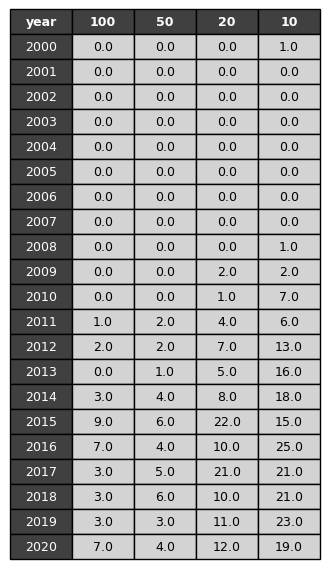

In [99]:
import matplotlib.pyplot as plt

filtered_y_rp___count=filter_annual_payout_table___count(y_rp)
print(filtered_y_rp___count)
plot_and_colorize_annual_table(filtered_y_rp___count, country, method, return_period, value_field, aggregation, '2020', 5.5, 4.0)


In [ ]:
display(y_rp_oos)

display(y_rp)

hist_and_oos_y_rp = pd.concat([y_rp, y_rp_oos], ignore_index=True)

display(hist_and_oos_y_rp)


#### Out of Sample Top 10 years graphic:

Filtered and Reordered DataFrame with Renamed Numeric Columns:
  percentile  percapita_100k  occurrence return period payout rate
0         90             0.0         290          10.0         30%
1         91             0.1          14          11.1   undefined
2         95             1.5           9          20.0         55%
3         98             5.5           3          50.0         75%
4         99            13.8           3         100.0        100%
5        max           101.9           1            --          --
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/table_png/percentile and payout table' created.


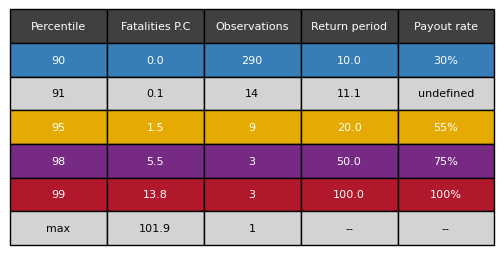

,year,first_value,average_value,count_100,pop prop_100,pop sum_100,pay weight 100,count_50,pop prop_50,pop sum_50,pay weight 50,count_20,pop prop_20,pop sum_20,pay weight 20,count_10,pop prop_10,pop sum_10,pay weight 10,weight_rp,payout rate (%),Total Payout
0,2019,101.9,6.5,1,0.1,10326532.2,5.1,1,0.1,14658052.5,5.4,3,0.3,59516083.9,16.0,4,0.5,100878840.5,14.8,250,41.3,412577.1
1,2020,50.5,5.0,3,0.2,33103255.0,16.2,0,0.0,0.0,0.0,1,0.2,36737456.2,9.9,3,0.4,74873288.8,11.0,350,37.1,370756.8
2,2018,13.0,1.1,0,0.0,0.0,0.0,1,0.1,10326532.2,3.8,2,0.1,22776722.8,6.1,2,0.3,55884747.6,8.2,110,18.1,181229.5
3,2000,1.5,0.2,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0.2,24484235.5,8.8,0,0.0,0.0,0.0,20,8.8,88277.3
4,2001,2.4,0.4,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0.2,24950505.8,8.7,0,0.0,0.0,0.0,20,8.7,87316.7
5,2008,2.1,0.3,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0.1,28431514.3,8.1,0,0.0,0.0,0.0,20,8.1,81077.3
6,2016,0.7,0.1,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0.2,41224790.2,6.1,10,6.1,60515.5
7,2017,6.9,0.4,0,0.0,0.0,0.0,1,0.1,10326532.2,3.8,0,0.0,0.0,0.0,1,0.1,14658052.5,2.2,60,5.9,59414.0
8,2009,0.3,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0.1,28970157.2,4.4,10,4.4,43757.4
9,1991,4.4,0.3,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0.1,8477763.9,3.8,0,0.0,0.0,0.0,20,3.8,37706.7


Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/table_png' already exists.


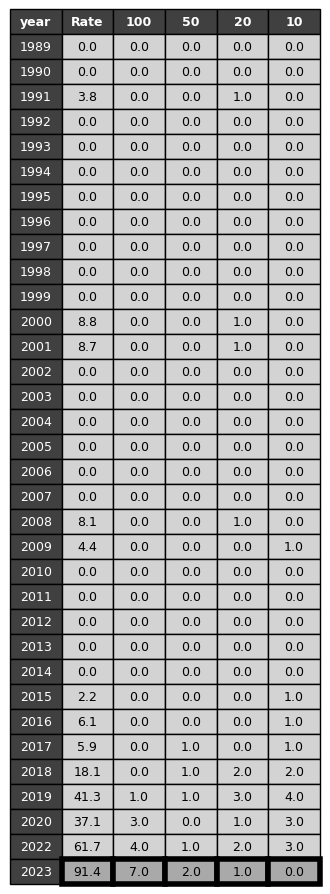

Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/plot_png' created.


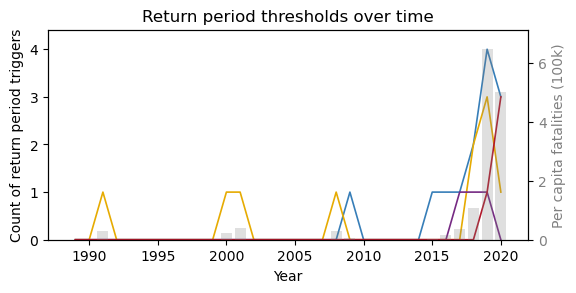

map for: 0


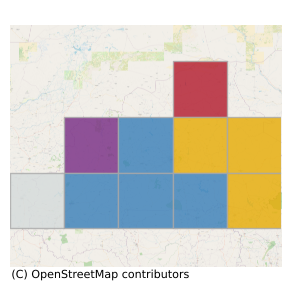

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/map_png/Burkina Faso conflict year 0 in 2019.0 investigating percapita_100k with dimensions 3.50x3.50.png
map for: 1


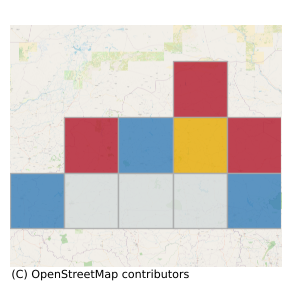

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/map_png/Burkina Faso conflict year 1 in 2020.0 investigating percapita_100k with dimensions 3.50x3.50.png
map for: 2


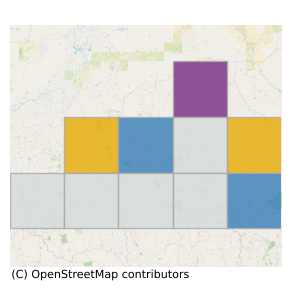

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/map_png/Burkina Faso conflict year 2 in 2018.0 investigating percapita_100k with dimensions 3.50x3.50.png
map for: 3


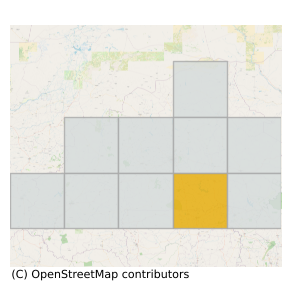

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/map_png/Burkina Faso conflict year 3 in 2000.0 investigating percapita_100k with dimensions 3.50x3.50.png
map for: 4


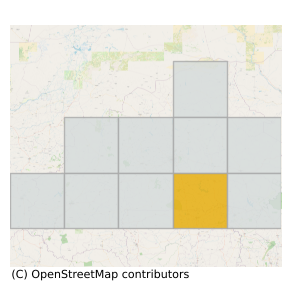

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/map_png/Burkina Faso conflict year 4 in 2001.0 investigating percapita_100k with dimensions 3.50x3.50.png
map for: 5


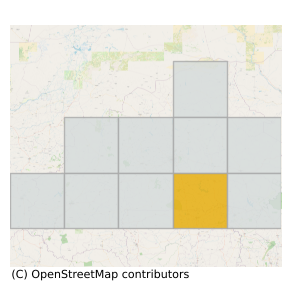

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/map_png/Burkina Faso conflict year 5 in 2008.0 investigating percapita_100k with dimensions 3.50x3.50.png
map for: 6


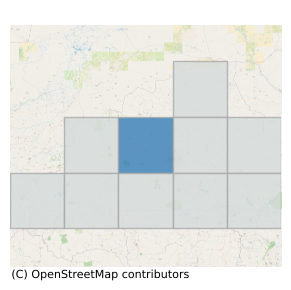

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/map_png/Burkina Faso conflict year 6 in 2016.0 investigating percapita_100k with dimensions 3.50x3.50.png
map for: 7


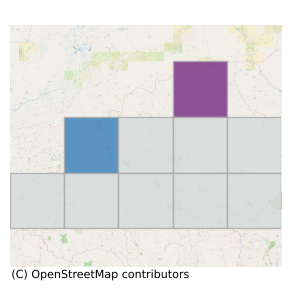

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/map_png/Burkina Faso conflict year 7 in 2017.0 investigating percapita_100k with dimensions 3.50x3.50.png
map for: 8


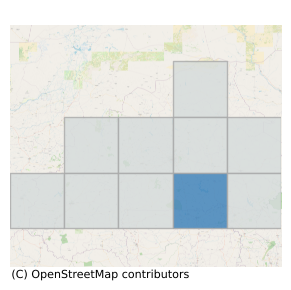

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/map_png/Burkina Faso conflict year 8 in 2009.0 investigating percapita_100k with dimensions 3.50x3.50.png
map for: 9


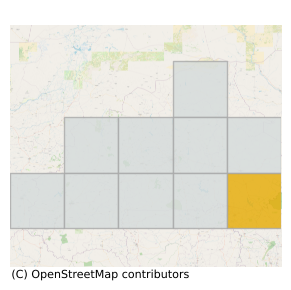

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/map_png/Burkina Faso conflict year 9 in 1991.0 investigating percapita_100k with dimensions 3.50x3.50.png
map for: 0


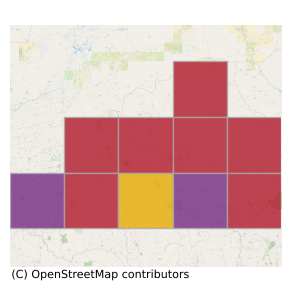

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/out_of_sample/map_png/Burkina Faso conflict year 0 in 2023.0 investigating percapita_100k with dimensions 3.50x3.50.png
map for: 1


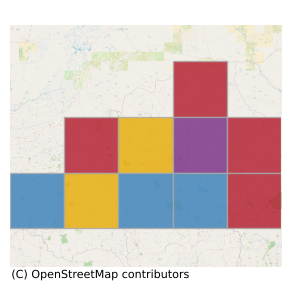

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/out_of_sample/map_png/Burkina Faso conflict year 1 in 2022.0 investigating percapita_100k with dimensions 3.50x3.50.png


In [543]:
#produces graphics, tables, and maps for the CELL TYPE RETURN PERIOD:
y_rows = y_rp.shape[0]
y_rows_oos = y_rp_oos.shape[0]

filtered_y_rp___count=filter_annual_payout_table___count(hist_and_oos_y_rp)

#make the insurance table columns lowercase to keep in line with JPR standards:
z.columns = z.columns.str.lower()
print(z)
#-----This is setting up things to export a map---------------------------------------------------------------
sorted_annual_table = query_and_sort_annual_table(y_rp, field_to_sort='payout rate (%)', number_of_rows=y_rows)
sorted_annual_table.iloc[:, 1:] = sorted_annual_table.iloc[:, 1:].round(1)
sorted_annual_table = sorted_annual_table.reset_index(drop=True)

#sort out of sample
sorted_annual_table_oos = query_and_sort_annual_table(y_rp_oos, field_to_sort='payout rate (%)', number_of_rows=y_rows_oos)
sorted_annual_table_oos.iloc[:, 1:] = sorted_annual_table_oos.iloc[:, 1:].round(1)
sorted_annual_table_oos = sorted_annual_table_oos.reset_index(drop=True)

filtered_colors = filtered_info['Color'].tolist()
lineplot_colors = filtered_colors[1:]
image_save_returnperiodtable(z, color_scheme, insurance_attribute, country, method, return_period, value_field, aggregation=aggregation, figure_height=1.75, figure_width=2.5,) #input_table = Jerry_table
    #image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info_upto30, country, 'Aggregation', 'Cell', year_to_eval, '3', figure_height=3.5, figure_width=3.5)
display(sorted_annual_table)

plot_and_colorize_annual_table(filtered_y_rp___count, country, method, return_period, value_field, aggregation, '2023', 5.5, 4.0, feature_year_in_table='yes', year_id=2023)
plot_histogram_with_lineplot_4(x, filtered_info, country, method, return_period, aggregation=aggregation, value_field=value_field, labels_to_omit='Below 1 in 10 year', figure_height=3.0, figure_width=6.0)


gdf = retrieve_geodataframe(aggregation)
for annual_event in range(min(10, y_rows)):
        print(f'map for: {annual_event}')
        year_to_eval = define_year_to_map(sorted_annual_table, annual_event)
        gdf_merged = query_geodataframe(gdf, x, year_to_eval, field=value_field)
        image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info, country, method, return_period, year_to_eval, value_field, aggregation, field=value_field, country_label='no', figure_height=3.5, figure_width=3.5, year_id=annual_event)


gdf_oos = retrieve_geodataframe(aggregation)
for annual_event in range(min(2, y_rows_oos)):
        print(f'map for: {annual_event}')
        year_to_eval = define_year_to_map(sorted_annual_table_oos, annual_event)
        gdf_merged = query_geodataframe(gdf, x_oos, year_to_eval, field=value_field)
        image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info, country, method, return_period, year_to_eval, value_field, aggregation, field=value_field, country_label='no', figure_height=3.5, figure_width=3.5, out_of_sample='yes' ,year_id=annual_event)



In [157]:
print(list(y_rp))

['year', 'first_value', 'average_value', 'count_100', 'pop prop_100', 'pop sum_100', 'pay weight 100', 'count_50', 'pop prop_50', 'pop sum_50', 'pay weight 50', 'count_20', 'pop prop_20', 'pop sum_20', 'pay weight 20', 'count_10', 'pop prop_10', 'pop sum_10', 'pay weight 10', 'weight_rp', 'payout rate (%)', 'Total Payout']


Filtered and Reordered DataFrame with Renamed Numeric Columns:
  percentile  fatalities_sum  occurrence return period payout rate
0       88.1             1.0          73           8.4   undefined
1         90             4.0         188          10.0         30%
2         95            27.0         113          20.0         55%
3         98            80.2          37          50.0         75%
4         99           182.1          37         100.0        100%
5        max          1599.0           1            --          --
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Yemen/standard/Country year/table_png/percentile and payout table' created.


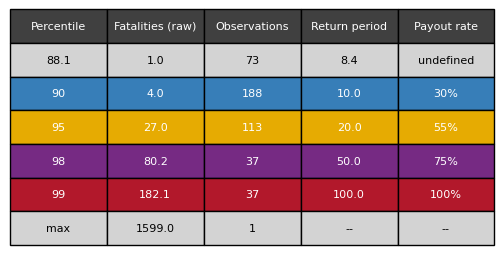

,year,first_value,average_value,count_100,pop prop_100,pop sum_100,pay weight 100,count_50,pop prop_50,pop sum_50,pay weight 50,count_20,pop prop_20,pop sum_20,pay weight 20,count_10,pop prop_10,pop sum_10,pay weight 10,weight_rp,payout rate (%),Total Payout
0,2015,1306.0,24.9,9,0.2,6101235.3,22.0,6,0.1,2135477.7,5.8,22,0.3,7945609.0,15.7,15,0.2,5273738.6,5.7,1790,49.2,491822.2
1,2016,543.0,12.8,7,0.2,5332753.5,19.2,4,0.1,1439048.4,3.9,10,0.2,4253523.0,8.4,25,0.3,8013931.6,8.7,1350,40.2,401800.0
2,2017,487.0,10.1,3,0.1,4087636.6,14.7,5,0.1,1578971.8,4.3,21,0.2,6058631.4,12.0,21,0.3,7108003.0,7.7,1180,38.7,386703.5
3,2018,1599.0,13.2,3,0.1,1628372.6,5.9,6,0.2,4896069.8,13.2,10,0.2,4652308.8,9.2,21,0.2,4721753.4,5.1,1010,33.4,334089.2
4,2019,508.0,8.8,3,0.1,1765414.2,6.4,3,0.0,1237936.9,3.3,11,0.3,6962008.6,13.8,23,0.3,7641966.9,8.3,900,31.8,317515.4
5,2020,998.0,17.7,7,0.1,2381832.9,8.6,4,0.1,1557928.3,4.2,12,0.2,6450513.1,12.8,19,0.2,5597137.7,6.0,1330,31.6,316133.8
6,2014,307.0,6.9,3,0.1,3500246.9,12.6,4,0.0,315790.0,0.9,8,0.1,3391061.3,6.7,18,0.2,4761372.9,5.1,840,25.3,253224.8
7,2012,1046.0,8.4,2,0.0,382548.1,1.4,2,0.1,2327999.7,6.3,7,0.1,1595703.6,3.2,13,0.1,2320712.3,2.5,570,13.3,133351.5
8,2011,928.0,4.9,1,0.0,168148.4,0.6,2,0.1,2431826.9,6.6,4,0.1,2309442.6,4.6,6,0.0,464564.0,0.5,340,12.3,122516.8
9,2013,81.0,1.7,0,0.0,0.0,0.0,1,0.0,405272.6,1.1,5,0.1,3208762.2,6.4,16,0.1,2346251.6,2.5,310,10.0,99864.2


Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Yemen/standard/Country year/1x1/table_png' created.


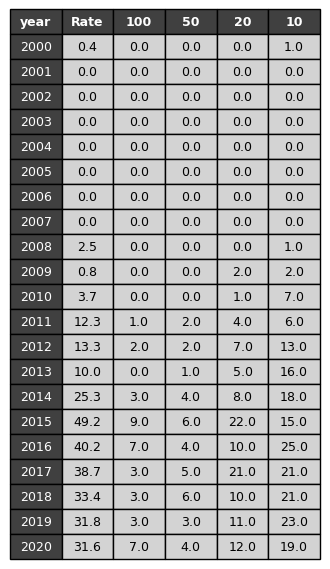

Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Yemen/standard/Country year/plot_png' created.


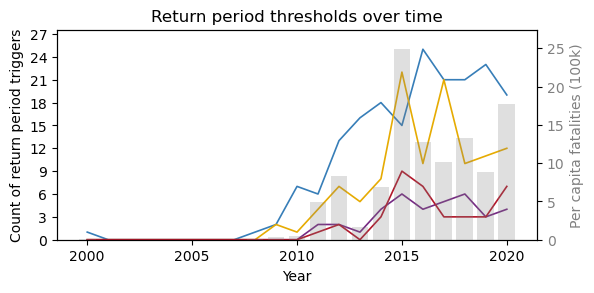

map for: 0


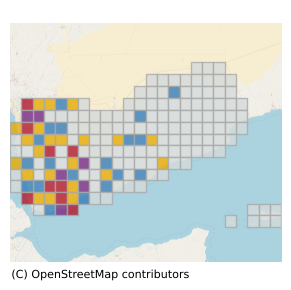

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Yemen/standard/Country year/map_png/Yemen conflict year 0 in 2015.0 investigating fatalities_sum with dimensions 3.50x3.50.png
map for: 1


KeyboardInterrupt: 

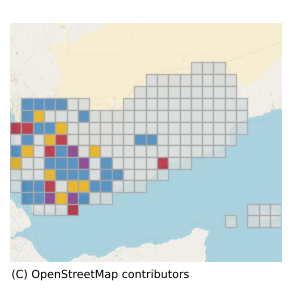

In [158]:
#produces graphics, tables, and maps for the CELL TYPE RETURN PERIOD:
y_rows = y_rp.shape[0]
filtered_y_rp___count=filter_annual_payout_table___count(y_rp)

#make the insurance table columns lowercase to keep in line with JPR standards:
z.columns = z.columns.str.lower()
print(z)
#-----This is setting up things to export a map---------------------------------------------------------------
sorted_annual_table = query_and_sort_annual_table(y_rp, field_to_sort='payout rate (%)', number_of_rows=y_rows)
sorted_annual_table.iloc[:, 1:] = sorted_annual_table.iloc[:, 1:].round(1)
sorted_annual_table = sorted_annual_table.reset_index(drop=True)

filtered_colors = filtered_info['Color'].tolist()
lineplot_colors = filtered_colors[1:]
image_save_returnperiodtable(z, color_scheme, insurance_attribute, country, method, return_period, value_field, aggregation=aggregation, figure_height=1.75, figure_width=2.5,) #input_table = Jerry_table
    #image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info_upto30, country, 'Aggregation', 'Cell', year_to_eval, '3', figure_height=3.5, figure_width=3.5)
display(sorted_annual_table)
plot_and_colorize_annual_table(filtered_y_rp___count, country, method, return_period, value_field, aggregation, '2020', 5.5, 4.0, annual_event)
plot_histogram_with_lineplot_4(x, filtered_info, country, method, return_period, aggregation=aggregation, value_field=value_field, labels_to_omit='Below 1 in 10 year', figure_height=3.0, figure_width=6.0)


gdf = retrieve_geodataframe(aggregation)
for annual_event in range(min(10, y_rows)):
        print(f'map for: {annual_event}')
        year_to_eval = define_year_to_map(sorted_annual_table, annual_event)
        gdf_merged = query_geodataframe(gdf, x, year_to_eval, field=value_field)
        image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info, country, method, return_period, year_to_eval, value_field, aggregation, field=value_field, country_label='no', figure_height=3.5, figure_width=3.5, year_id=annual_event)


In [ ]:
import pandas as pd
import os
from PIL import Image, ImageDraw, ImageFont

import os
import sys

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("The current Working Directory is:", current_directory)

# Get the path to the base directory (VIEWS_FAO_index)
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(f'The base directory will be set to: {base_dir}')

# Add the base directory to sys.path
sys.path.insert(0, base_dir)

from src.utils.universal_functions.setup.build_directory import ensure_directory_exists

def find_file_with_string(folder_path, search_string):
    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        # Check if the search_string is in the filename
        if search_string in filename:
            return filename
    return None


"""
This gives the formatting criteria for OPTION 2 Slides (1 & 2)
"""

def map_top_years(country, method, returnperiodmethod, summary_text, aggregation='0'): 

    base_directory = os.getcwd()
    font_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/OpenSans-VariableFont.ttf'
    template_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/PRIO Layout A Sept2.png'
    template_image = Image.open(template_path)

    aggregation_string = aggregation + 'x' + aggregation

    if aggregation == '1':
        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'map_png/'
        print(map_path)
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + aggregation_string +  '/table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        output_path = base_directory + '/files/Layouts/' + country + '/' 

    else:
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string   + '/' + 'map_png/'
        print(map_path)
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        output_path = base_directory + '/files/Layouts/' + country + '/' 


    ensure_directory_exists(output_path)

    #look for the graphic with the appropriate dimensions:
    #Map 1
    map_filename_0 = find_file_with_string(map_path, 'conflict year 0 ') # looking for a 3.5 x 3.5 map 
    print(map_filename_0)

    year__0 = re.search(r"\b\d{4}\b", map_filename_0)

    # Convert the match to an integer and print
    if year__0:
        year__0 = str(int(year__0.group()))
        print(year__0)

    #Map 2
    map_filename_1 = find_file_with_string(map_path, 'conflict year 1 ') # looking for a 3.5 x 3.5 map
    print(map_filename_1)

    year__1 = re.search(r"\b\d{4}\b", map_filename_1)
        # Convert the match to an integer and print
    if year__1:
        year__1 = str(int(year__1.group()))
        print(year__1)

    #Map 3
    map_filename_2 = find_file_with_string(map_path, 'conflict year 2 ') # looking for a 3.5 x 3.5 map
    print(map_filename_2)

    year__2 = re.search(r"\b\d{4}\b", map_filename_2)
        # Convert the match to an integer and print
    if year__2:
        year__2 = str(int(year__2.group()))
        print(year__2)

    #Map 4
    map_filename_3 = find_file_with_string(map_path, 'conflict year 3 ') # looking for a 3.5 x 3.5 map
    print(map_filename_3)

    year__3 = re.search(r"\b\d{4}\b", map_filename_3)
        # Convert the match to an integer and print
    if year__3:
        year__3 = str(int(year__3.group()))
        print(year__3)

    #Map 5
    map_filename_4 = find_file_with_string(map_path, 'conflict year 4 ') # looking for a 3.5 x 3.5 map
    print(map_filename_4)

    year__4 = re.search(r"\b\d{4}\b", map_filename_4)
        # Convert the match to an integer and print
    if year__4:
        year__4 = str(int(year__4.group()))
        print(year__4)

    #Map 6
    map_filename_5 = find_file_with_string(map_path, 'conflict year 5 ') # looking for a 3.5 x 3.5 map
    print(map_filename_5)

    year__5 = re.search(r"\b\d{4}\b", map_filename_5)
        # Convert the match to an integer and print
    if year__5:
        year__5 = str(int(year__5.group()))
        print(year__5)

    #Map 7
    map_filename_6 = find_file_with_string(map_path, 'conflict year 6 ') # looking for a 3.5 x 3.5 map
    print(map_filename_6)

    year__6 = re.search(r"\b\d{4}\b", map_filename_6)
        # Convert the match to an integer and print
    if year__6:
        year__6 = str(int(year__6.group()))
        print(year__6)

    #Map 8
    map_filename_7 = find_file_with_string(map_path, 'conflict year 7 ') # looking for a 3.5 x 3.5 map
    print(map_filename_7)

    year__7 = re.search(r"\b\d{4}\b", map_filename_7)
        # Convert the match to an integer and print
    if year__7:
        year__7 = str(int(year__7.group()))
        print(year__7)

    #Map 9
    map_filename_8 = find_file_with_string(map_path, 'conflict year 8 ') # looking for a 3.5 x 3.5 map
    print(map_filename_8)

    year__8 = re.search(r"\b\d{4}\b", map_filename_8)
        # Convert the match to an integer and print
    if year__8:
        year__8 = str(int(year__8.group()))
        print(year__8)

    #Map 10
    map_filename_9 = find_file_with_string(map_path, 'conflict year 9 ') # looking for a 3.5 x 3.5 map
    print(map_filename_9)

    year__9 = re.search(r"\b\d{4}\b", map_filename_9)
        # Convert the match to an integer and print
    if year__9:
        year__9 = str(int(year__9.group()))
        print(year__9)

    annual_table_filename = find_file_with_string(annual_table_path, '4.0x5.5') #  looking for a 2.5 x 1.75 map 4_0x5_5
    print(annual_table_filename)
    return_period_table_fileneame = find_file_with_string(return_period_table_path, '2.5x1.8')
    print(return_period_table_fileneame)
    return_period_lineplot_fileneame = find_file_with_string(return_period_lineplot_path, '6.0x3.0')
    print(return_period_lineplot_fileneame)



    # Load the template image
    #template_path = 'Slide 1 Option B Template.png'

    template_image = template_image.resize((1620, 915), Image.Resampling.LANCZOS)
    draw = ImageDraw.Draw(template_image)

    #template_image = Image.open(template_path)
    #draw = ImageDraw.Draw(template_image)

    # # Define grid parameters
    # grid_spacing = 50  # Adjust the spacing as needed
    # grid_color = "blue"
    # grid_width = 1

    # # Define the font for the grid labels
    # font = ImageFont.load_default()

    # # Get the dimensions of the template image
    # width, height = template_image.size

    # # Draw the grid
    # for x in range(0, width, grid_spacing):
    #     draw.line([(x, 0), (x, height)], fill=grid_color, width=grid_width)
    #     draw.text((x, 0), str(x), fill=grid_color, font=font)
    # for y in range(0, height, grid_spacing):
    #     draw.line([(0, y), (width, y)], fill=grid_color, width=grid_width)
    #     draw.text((0, y), str(y), fill=grid_color, font=font)

    # Define the positions and sizes for placeholders
    positions = [
#Main map
        {'position': (425, 200), 'size': (400, 350), 'label': year__0,'filename': map_filename_0, 'folder': map_path, 'font_size':14},      # Main Map
#map grid 3x3
        {'position': (925, 175), 'size': (200, 200), 'label': year__1,'filename': map_filename_1, 'folder': map_path, 'font_size': 10},       # Year 1
        {'position': (925, 400), 'size': (200, 200), 'label': year__4,'filename': map_filename_4, 'folder': map_path, 'font_size':10},       # Year 1
        {'position': (925, 625), 'size': (200, 200), 'label': year__7,'filename': map_filename_7, 'folder': map_path, 'font_size':10},       # Year 1
        {'position': (1150, 175), 'size': (200, 200), 'label': year__2,'filename': map_filename_2, 'folder': map_path, 'font_size':10},       # Year 1
        {'position': (1150, 400), 'size': (200, 200), 'label': year__5,'filename': map_filename_5, 'folder': map_path, 'font_size':10},       # Year 1
        {'position': (1150, 625), 'size': (200, 200), 'label': year__8,'filename': map_filename_8, 'folder': map_path, 'font_size':10},       # Year 1
        {'position': (1375, 175), 'size': (200, 200), 'label': year__3,'filename': map_filename_3, 'folder': map_path, 'font_size':10},       # Year 1
        {'position': (1375, 400), 'size': (200, 200), 'label': year__6,'filename': map_filename_6, 'folder': map_path, 'font_size':10},       # Year 1
        {'position': (1375, 625), 'size': (200, 200), 'label': year__9,'filename': map_filename_9, 'folder': map_path, 'font_size':10},       # Year 1
#annual report table
        {'position': (50, 200), 'size': (300, 635), 'label': '','filename': annual_table_filename, 'folder': annual_table_path, 'font_size':9},       # Year 1
#insurance table
        {'position': (425, 625), 'size': (400, 200), 'label': '','filename': return_period_table_fileneame, 'folder': return_period_table_path,'font_size':1},     # Payout Legend 
       
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Legend'},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Legend'},     # Payout Legend Title

    ]

        # Define the positions and sizes for text boxes
    text_boxes = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        #{'position': (65, 215), 'size': (270, 325), 'label':  summary_text,'font_size': 15}
    ]

    title = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        {'position': (50, 25), 'size': (600, 125), 'label':  country, 'font_size': 92}
    ]

    title_boxes = [
        {'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        {'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        #{'position': (50, 200), 'size': (300, 350), 'label': '','font_size': 32},     # empty text box

        #{'position': (50, 175), 'size': (300, 500), 'label':  summary_text,'font_size': 14}
    ]

        # # Load and paste the images onto the template
    for pos in positions:
        if 'folder' in pos and 'filename' in pos:
                img_path = os.path.join(pos['folder'], pos['filename'])
                if os.path.exists(img_path):
                    img = Image.open(img_path)
                    img = img.resize(pos['size'], Image.Resampling.LANCZOS)
                    template_image.paste(img, pos['position'])
                else:
                    print(f"Image {pos['filename']} not found in {pos['folder']}")
        else:
                print(f"Missing 'folder' or 'filename' in: {pos}")

# Add text boxes
    # Add text boxes
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    for title_b in title_boxes:
        x, y = title_b['position']
        w, h = title_b['size']
        label = title_b['label']
        font_size = title_b['font_size']  # Get the font size from the dictionary

            # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    #     Draw a rectangle around the text box area with a dark grey background
        draw.rectangle([x, y, x + w, y + h], fill="darkgrey", outline="black", width=2)

    #     # Calculate the bounding box of the text
        text_bbox = draw.textbbox((0, 0), label, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

         # Calculate the position to center the text
        text_x = x + (w - text_width) / 2
        text_y = y + (h - text_height) / 3

    #     # Draw the text centered in the box with white color
        draw.text((text_x, text_y), label, fill="white", font=font)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------
    for t in title:
        x, y = t['position']
        w, h = t['size']
        label = t['label']
        font_size = t['font_size']  # Get the font size from the dictionary

        # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

        # Draw a rectangle around the text box area with a dark grey background
        #draw.rectangle([x, y, x + w, y + h], fill="grey", outline="white", width=2)
        #draw.rectangle([x, y, x + w, y + h])

        # Wrap the text to fit inside the box
        wrapped_text = []
        words = label.split()
        line = ""

        for word in words:
            # Add the word to the line and check if it fits
            test_line = line + word + " "
            text_bbox = draw.textbbox((0, 0), test_line, font=font)
            test_width = text_bbox[2] - text_bbox[0]

            if test_width <= w:
                line = test_line
            else:
                # If the line is too long, add the current line to wrapped_text and start a new line
                wrapped_text.append(line.strip())
                line = word + " "

        # Add the last line
        wrapped_text.append(line.strip())

        # Draw the text line by line, adjusting the position
        current_y = y
        for line in wrapped_text:
            draw.text((x, current_y), line, fill="black", font=font)
            current_y += font_size  # Move to the next line

        # Ensure that the text doesn't overflow the box height
        if current_y > y + h:
            print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    for box in text_boxes:
        x, y = box['position']
        w, h = box['size']
        label = box['label']
        font_size = box['font_size']  # Get the font size from the dictionary

        # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

        # Draw a rectangle around the text box area with a dark grey background
        #draw.rectangle([x, y, x + w, y + h], fill="white", outline="white", width=2)
        #draw.rectangle([x, y, x + w, y + h])

        # Wrap the text to fit inside the box
        wrapped_text = []
        words = label.split()
        line = ""

        for word in words:
            # Add the word to the line and check if it fits
            test_line = line + word + " "
            text_bbox = draw.textbbox((0, 0), test_line, font=font)
            test_width = text_bbox[2] - text_bbox[0]

            if test_width <= w:
                line = test_line
            else:
                # If the line is too long, add the current line to wrapped_text and start a new line
                wrapped_text.append(line.strip())
                line = word + " "

        # Add the last line
        wrapped_text.append(line.strip())

        # Draw the text line by line, adjusting the position
        current_y = y
        for line in wrapped_text:
            draw.text((x, current_y), line, fill="black", font=font)
            current_y += font_size  # Move to the next line

        # Ensure that the text doesn't overflow the box height
        if current_y > y + h:
            print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")

#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         

    # Draw rectangles at specified positions
    for pos in positions:
        x, y = pos['position']
        w, h = pos['size']
        draw.rectangle([x, y, x + w, y + h], outline="black", width=3)
        draw.text((x, y - 20), pos['label'], fill="black")
        font_size = pos['font_size']  # Get the font size from the dictionary

        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    # Save and show the template with marked positions
    #marked_template_path = '/Users/gbenz/Desktop/tmp.png'
            
        # Save the final image with a specified filename
            

    output_filename = os.path.join(output_path, f'{country}_{method}_{returnperiodmethod}_{aggregation}x{aggregation}.png')
    print(f'file saved to: {output_filename}')
    template_image.save(output_filename)
    template_image.show()

In [162]:
import pandas as pd
import os
from PIL import Image, ImageDraw, ImageFont

import os
import sys

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("The current Working Directory is:", current_directory)

# Get the path to the base directory (VIEWS_FAO_index)
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(f'The base directory will be set to: {base_dir}')

# Add the base directory to sys.path
sys.path.insert(0, base_dir)

from src.utils.universal_functions.setup.build_directory import ensure_directory_exists

def find_file_with_string(folder_path, search_string):
    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        # Check if the search_string is in the filename
        if search_string in filename:
            return filename
    return None


"""
This gives the formatting criteria for OPTION 2 Slides (1 & 2)
"""

def map_top_years_oos(country, method, returnperiodmethod, aggregation='0'): 

    base_directory = os.getcwd()
    font_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/OpenSans-VariableFont.ttf'
    template_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/Layout Statsheet A Oct9.png'
    template_image = Image.open(template_path)

    aggregation_string = aggregation + 'x' + aggregation

    if aggregation == '1':
        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'map_png/'
        print(map_path)

        oos_map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/out_of_sample/map_png/'
        print(oos_map_path)

        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + aggregation_string +  '/table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        output_path = base_directory + '/files/Layouts/' + country + '/' 

    else:
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string   + '/' + 'map_png/'
        print(map_path)

        oos_map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/out_of_sample/map_png/'
        print(oos_map_path)

        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        output_path = base_directory + '/files/Layouts/' + country + '/' 


    ensure_directory_exists(output_path)

    #look for the graphic with the appropriate dimensions:
    #Main Map 1
    oos_filename_0 = find_file_with_string(oos_map_path, 'conflict year 0 ') # looking for a 3.5 x 3.5 map 
    print(oos_filename_0)

    oos_year__0 = re.search(r"\b\d{4}\b", oos_filename_0)

    # Convert the match to an integer and print
    if oos_year__0:
        oos_year__0 = str(int(oos_year__0.group()))
        print(oos_year__0)

    #Map 1
    map_filename_0 = find_file_with_string(map_path, 'conflict year 0 ') # looking for a 3.5 x 3.5 map 
    print(map_filename_0)

    year__0 = re.search(r"\b\d{4}\b", map_filename_0)

    # Convert the match to an integer and print
    if year__0:
        year__0 = str(int(year__0.group()))
        print(year__0)

    #Map 2
    map_filename_1 = find_file_with_string(map_path, 'conflict year 1 ') # looking for a 3.5 x 3.5 map
    print(map_filename_1)

    year__1 = re.search(r"\b\d{4}\b", map_filename_1)
        # Convert the match to an integer and print
    if year__1:
        year__1 = str(int(year__1.group()))
        print(year__1)

    #Map 3
    map_filename_2 = find_file_with_string(map_path, 'conflict year 2 ') # looking for a 3.5 x 3.5 map
    print(map_filename_2)

    year__2 = re.search(r"\b\d{4}\b", map_filename_2)
        # Convert the match to an integer and print
    if year__2:
        year__2 = str(int(year__2.group()))
        print(year__2)

    #Map 4
    map_filename_3 = find_file_with_string(map_path, 'conflict year 3 ') # looking for a 3.5 x 3.5 map
    print(map_filename_3)

    year__3 = re.search(r"\b\d{4}\b", map_filename_3)
        # Convert the match to an integer and print
    if year__3:
        year__3 = str(int(year__3.group()))
        print(year__3)

    #Map 5
    map_filename_4 = find_file_with_string(map_path, 'conflict year 4 ') # looking for a 3.5 x 3.5 map
    print(map_filename_4)

    year__4 = re.search(r"\b\d{4}\b", map_filename_4)
        # Convert the match to an integer and print
    if year__4:
        year__4 = str(int(year__4.group()))
        print(year__4)

    #Map 6
    map_filename_5 = find_file_with_string(map_path, 'conflict year 5 ') # looking for a 3.5 x 3.5 map
    print(map_filename_5)

    year__5 = re.search(r"\b\d{4}\b", map_filename_5)
        # Convert the match to an integer and print
    if year__5:
        year__5 = str(int(year__5.group()))
        print(year__5)

    #Map 7
    map_filename_6 = find_file_with_string(map_path, 'conflict year 6 ') # looking for a 3.5 x 3.5 map
    print(map_filename_6)

    year__6 = re.search(r"\b\d{4}\b", map_filename_6)
        # Convert the match to an integer and print
    if year__6:
        year__6 = str(int(year__6.group()))
        print(year__6)

    #Map 8
    map_filename_7 = find_file_with_string(map_path, 'conflict year 7 ') # looking for a 3.5 x 3.5 map
    print(map_filename_7)

    year__7 = re.search(r"\b\d{4}\b", map_filename_7)
        # Convert the match to an integer and print
    if year__7:
        year__7 = str(int(year__7.group()))
        print(year__7)

    #Map 9
    map_filename_8 = find_file_with_string(map_path, 'conflict year 8 ') # looking for a 3.5 x 3.5 map
    print(map_filename_8)

    year__8 = re.search(r"\b\d{4}\b", map_filename_8)
        # Convert the match to an integer and print
    if year__8:
        year__8 = str(int(year__8.group()))
        print(year__8)

    #Map 10
    map_filename_9 = find_file_with_string(map_path, 'conflict year 9 ') # looking for a 3.5 x 3.5 map
    print(map_filename_9)

    year__9 = re.search(r"\b\d{4}\b", map_filename_9)
        # Convert the match to an integer and print
    if year__9:
        year__9 = str(int(year__9.group()))
        print(year__9)

    annual_table_filename = find_file_with_string(annual_table_path, '4.0x5.5') #  looking for a 2.5 x 1.75 map 4_0x5_5
    print(annual_table_filename)
    return_period_table_fileneame = find_file_with_string(return_period_table_path, '2.5x1.8')
    print(return_period_table_fileneame)
    return_period_lineplot_fileneame = find_file_with_string(return_period_lineplot_path, '6.0x3.0')
    print(return_period_lineplot_fileneame)



    # Load the template image
    #template_path = 'Slide 1 Option B Template.png'

    template_image = template_image.resize((1620, 915), Image.Resampling.LANCZOS)
    draw = ImageDraw.Draw(template_image)

    #template_image = Image.open(template_path)
    #draw = ImageDraw.Draw(template_image)

    # # Define grid parameters
    # grid_spacing = 50  # Adjust the spacing as needed
    # grid_color = "blue"
    # grid_width = 1

    # # Define the font for the grid labels
    # font = ImageFont.load_default()

    # # Get the dimensions of the template image
    # width, height = template_image.size

    # # Draw the grid
    # for x in range(0, width, grid_spacing):
    #     draw.line([(x, 0), (x, height)], fill=grid_color, width=grid_width)
    #     draw.text((x, 0), str(x), fill=grid_color, font=font)
    # for y in range(0, height, grid_spacing):
    #     draw.line([(0, y), (width, y)], fill=grid_color, width=grid_width)
    #     draw.text((0, y), str(y), fill=grid_color, font=font)

    # Define the positions and sizes for placeholders
    positions = [
#Main map
        {'position': (425, 200), 'size': (400, 350), 'label': oos_year__0,'filename': oos_filename_0, 'folder': oos_map_path, 'font_size':12},      # Main Map
#map grid 3x3
        {'position': (925, 175), 'size': (200, 200), 'label': year__0,'filename': map_filename_0, 'folder': map_path, 'font_size': 12},       # Year 1
        {'position': (925, 400), 'size': (200, 200), 'label': year__3,'filename': map_filename_3, 'folder': map_path, 'font_size':12},       # Year 1
        {'position': (925, 625), 'size': (200, 200), 'label': year__6,'filename': map_filename_6, 'folder': map_path, 'font_size':12},       # Year 1
        {'position': (1150, 175), 'size': (200, 200), 'label': year__1,'filename': map_filename_1, 'folder': map_path, 'font_size':12},       # Year 1
        {'position': (1150, 400), 'size': (200, 200), 'label': year__4,'filename': map_filename_4, 'folder': map_path, 'font_size':12},       # Year 1
        {'position': (1150, 625), 'size': (200, 200), 'label': year__7,'filename': map_filename_7, 'folder': map_path, 'font_size':12},       # Year 1
        {'position': (1375, 175), 'size': (200, 200), 'label': year__2,'filename': map_filename_2, 'folder': map_path, 'font_size':12},       # Year 1
        {'position': (1375, 400), 'size': (200, 200), 'label': year__5,'filename': map_filename_5, 'folder': map_path, 'font_size':12},       # Year 1
        {'position': (1375, 625), 'size': (200, 200), 'label': year__8,'filename': map_filename_8, 'folder': map_path, 'font_size':12},       # Year 1
#annual report table
        {'position': (50, 200), 'size': (300, 635), 'label': '','filename': annual_table_filename, 'folder': annual_table_path, 'font_size':9},       # Year 1
#insurance table
        {'position': (425, 625), 'size': (400, 200), 'label': '','filename': return_period_table_fileneame, 'folder': return_period_table_path,'font_size':1},     # Payout Legend 
       
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Legend'},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Legend'},     # Payout Legend Title

    ]

        # Define the positions and sizes for text boxes
    text_boxes = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        #{'position': (65, 215), 'size': (270, 325), 'label':  summary_text,'font_size': 15}
    ]

    title = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        {'position': (50, 25), 'size': (600, 125), 'label':  country, 'font_size': 92}
    ]

    title_boxes = [
        {'position': (425, 575), 'size': (400, 50), 'label': 'Historic return period labels and threshold values','font_size': 16},     # Payout Legend Title
        {'position': (925, 100), 'size': (650, 50), 'label': 'Top historical payout years','font_size': 24},     # Payout Legend Title
        #{'position': (50, 200), 'size': (300, 350), 'label': '','font_size': 32},     # empty text box

        #{'position': (50, 175), 'size': (300, 500), 'label':  summary_text,'font_size': 14}
    ]

        # # Load and paste the images onto the template
    for pos in positions:


        if 'folder' in pos and 'filename' in pos:
                img_path = os.path.join(pos['folder'], pos['filename'])
                if os.path.exists(img_path):
                    img = Image.open(img_path)
                    img = img.resize(pos['size'], Image.Resampling.LANCZOS)
                    template_image.paste(img, pos['position'])
                else:
                    print(f"Image {pos['filename']} not found in {pos['folder']}")
        else:
                print(f"Missing 'folder' or 'filename' in: {pos}")

# Add text boxes
    # Add text boxes
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    for title_b in title_boxes:
        x, y = title_b['position']
        w, h = title_b['size']
        label = title_b['label']
        font_size = title_b['font_size']  # Get the font size from the dictionary

            # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    #     Draw a rectangle around the text box area with a dark grey background
        draw.rectangle([x, y, x + w, y + h], fill="darkgrey", outline="black", width=2)

    #     # Calculate the bounding box of the text
        text_bbox = draw.textbbox((0, 0), label, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

         # Calculate the position to center the text
        text_x = x + (w - text_width) / 2
        text_y = y + (h - text_height) / 3

    #     # Draw the text centered in the box with white color
        draw.text((text_x, text_y), label, fill="white", font=font)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------
    for t in title:
        x, y = t['position']
        w, h = t['size']
        label = t['label']
        font_size = t['font_size']  # Get the font size from the dictionary

        # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

        # Draw a rectangle around the text box area with a dark grey background
        #draw.rectangle([x, y, x + w, y + h], fill="grey", outline="white", width=2)
        #draw.rectangle([x, y, x + w, y + h])

        # Wrap the text to fit inside the box
        wrapped_text = []
        words = label.split()
        line = ""

        for word in words:
            # Add the word to the line and check if it fits
            test_line = line + word + " "
            text_bbox = draw.textbbox((0, 0), test_line, font=font)
            test_width = text_bbox[2] - text_bbox[0]

            if test_width <= w:
                line = test_line
            else:
                # If the line is too long, add the current line to wrapped_text and start a new line
                wrapped_text.append(line.strip())
                line = word + " "

        # Add the last line
        wrapped_text.append(line.strip())

        # Draw the text line by line, adjusting the position
        current_y = y
        for line in wrapped_text:
            draw.text((x, current_y), line, fill="black", font=font)
            current_y += font_size  # Move to the next line

        # Ensure that the text doesn't overflow the box height
        if current_y > y + h:
            print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    for box in text_boxes:
        x, y = box['position']
        w, h = box['size']
        label = box['label']
        font_size = box['font_size']  # Get the font size from the dictionary

        # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

        # Draw a rectangle around the text box area with a dark grey background
        #draw.rectangle([x, y, x + w, y + h], fill="white", outline="white", width=2)
        #draw.rectangle([x, y, x + w, y + h])

        # Wrap the text to fit inside the box
        wrapped_text = []
        words = label.split()
        line = ""

        for word in words:
            # Add the word to the line and check if it fits
            test_line = line + word + " "
            text_bbox = draw.textbbox((0, 0), test_line, font=font)
            test_width = text_bbox[2] - text_bbox[0]

            if test_width <= w:
                line = test_line
            else:
                # If the line is too long, add the current line to wrapped_text and start a new line
                wrapped_text.append(line.strip())
                line = word + " "

        # Add the last line
        wrapped_text.append(line.strip())

        # Draw the text line by line, adjusting the position
        current_y = y
        for line in wrapped_text:
            draw.text((x, current_y), line, fill="black", font=font)
            current_y += font_size  # Move to the next line

        # Ensure that the text doesn't overflow the box height
        if current_y > y + h:
            print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")

#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         

    # Draw rectangles at specified positions
    for pos in positions:
        x, y = pos['position']
        w, h = pos['size']
        font_size = pos['font_size']  # Get the font size from the dictionary

        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

        draw.rectangle([x, y, x + w, y + h], outline="black", width=3)
        draw.text((x, y - 20), pos['label'], fill="black", font=font)


    # Save and show the template with marked positions
    #marked_template_path = '/Users/gbenz/Desktop/tmp.png'


        # Save the final image with a specified filename
            

    output_filename = os.path.join(output_path, f'{country}_{method}_{returnperiodmethod}_{aggregation}x{aggregation}.png')
    print(f'file saved to: {output_filename}')
    template_image.save(output_filename)
    template_image.show()

The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index


In [ ]:
summary_text = 'text'

In [544]:
map_top_years_oos(country, method, return_period, aggregation)

/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/map_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/out_of_sample/map_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/table_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/table_png/percentile and payout table/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/aggregation/Country year/3x3/plot_png/
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Layouts/Burkina Faso' already exists.
Burkina Faso conflict year 0 in 2023.0 investigating percapita_100k with dimensions 3.50x3.50.png
2023
Burkina Faso conflict year 0 in 2019.0 investigating percapita_100k with dimensions 3.50x3.50.png
2019
Burkina Faso conflict year 1 in 2020.0 investigating percapita_100k w

In [ ]:
map_top_years(country, method, return_period, summary_text, aggregation)

## map_event_cat_rp_with_an_summary_tables:

#### Preconditions for setting up the mapping function `map_event_cat_rp_with_an_summary_tables`
Gives Top 10 years of conflict


Unlike preceding options, this function is still in development therefore still hosted locally in the notebook and not saved as .py file.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
from src.utils.universal_functions.setup.build_directory import float_to_custom_string, ensure_directory_exists

from matplotlib.ticker import MaxNLocator


def plot_histogram_with_lineplot_4(df, info_dataframe, country, method, returnperiodmethod, aggregation, value_field='percapita_100k', labels_to_omit='Below 1 in 10 year', figure_height=3.0, figure_width=6.0, histogram='on', horizontal_rp_expected= 'on'):
    figure_height_str = float_to_custom_string(figure_height)
    figure_width_str = float_to_custom_string(figure_width)

    aggregation_string = str(aggregation) + 'x' + str(aggregation)

    base_directory = os.getcwd()

    if aggregation == '1':
        output_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  +  '/plot_png'
    else:
        output_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/plot_png'

    ensure_directory_exists(output_path)

    output_file = os.path.join(output_path, f'{country} Annual Return Period LinePlot with dimensions {figure_width_str}x{figure_height_str}.png')

    # Calculate histogram data
    df_histogram = calculate_histogram_data(df)

    if 'pg_id' in x.columns:
    # Column exists, perform your action here
        unique_pg_id_count = x['pg_id'].nunique()
        print(unique_pg_id_count)

        expected_100_rp = unique_pg_id_count * 0.01
        print(expected_100_rp)

        expected_50_rp = unique_pg_id_count * 0.02
        print(expected_50_rp)

    
    elif 'priogrid_gid' in x.columns:
    # Column exists, perform your action here
        unique_pg_id_count = x['priogrid_gid'].nunique()
        print(unique_pg_id_count)

        expected_100_rp = unique_pg_id_count * 0.01
        print(expected_100_rp)

        expected_50_rp = unique_pg_id_count * 0.02
        print(expected_50_rp)



    else:
        unique_pg_id_count = x['GIS__Index'].nunique()
        print(unique_pg_id_count)

        expected_100_rp = unique_pg_id_count * 0.01
        print(expected_100_rp)

        expected_50_rp = unique_pg_id_count * 0.02
        print(expected_50_rp)
    

    # Initialize the list of labels to omit
    list_of_labels_to_omit = []
    for index, row in info_dataframe.iterrows():
        if row['Range'].startswith('0.0'):
            list_of_labels_to_omit.append(row['Label'])
    list_of_labels_to_omit.append(labels_to_omit)

    # Begin plotting
    fig, ax1 = plt.subplots(figsize=(figure_width, figure_height))

    # Plot the line plot (triggers) on the primary axis (ax1)
    results = {'year': [], 'Label': [], 'count': []}
    for year in df['year'].unique():
        for _, row in info_dataframe.iterrows():
            range_start, range_end = map(float, row['Range'].split(' - '))
            label = row['Label']

            count = df[(df['year'] == year) & 
                       (df[value_field] >= range_start) & 
                       (df[value_field] < range_end)].shape[0]

            results['year'].append(year)
            results['Label'].append(label)
            results['count'].append(count)

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.merge(info_dataframe[['Label', 'Color']], on='Label', how='left')

    # Filter out labels to omit
    results_df = results_df[~results_df['Label'].isin(list_of_labels_to_omit)]

    # Sort the DataFrame by year
    results_df = results_df.sort_values(by='year')

    # Plotting the line plot (for return period triggers) on the left axis (ax1)
    line_width = 1.2
    labels = results_df['Label'].unique()
    
    for label in labels:
        subset = results_df[results_df['Label'] == label]
        ax1.plot(subset['year'], subset['count'], label=label, color=subset['Color'].iloc[0], linewidth=line_width)

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Count of return period triggers', color='black')
    ax1.tick_params(axis='y', labelcolor='black')

    # Set integer ticks on ax1
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

    if horizontal_rp_expected == 'on':
        ax1.axhline(y=expected_100_rp, color='red', linestyle='--', linewidth=.5)
        ax1.axhline(y=expected_50_rp, color='purple', linestyle='--', linewidth=.5)


    if histogram == 'on':
        # Create the second y-axis for the histogram (per capita fatalities) on the right
        ax2 = ax1.twinx()

        # Plot histogram
        ax2.bar(df_histogram['year'], df_histogram['average_value'], color='gray', label='Per Capita Fatalities', alpha=0.25)
        ax2.set_ylabel('Per capita fatalities (100k)', color='gray')
        ax2.tick_params(axis='y', labelcolor='gray')

        # Adjust the y-axis limits for ax1 and ax2
        ax1_y_lim = ax1.get_ylim()
        ax2_y_lim = ax2.get_ylim()

        ax1.set_ylim(bottom=0, top=ax1_y_lim[1] * 1.05)
        ax2.set_ylim(bottom=0, top=ax2_y_lim[1] * 1.05)

    else:
        # If histogram is off, adjust only the primary axis (ax1)
        ax1_y_lim = ax1.get_ylim()
        ax1.set_ylim(bottom=0, top=ax1_y_lim[1] * 1.05)

    # Adjust the padding and margins to ensure alignment
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.85)

    # Add a legend
    lines, labels = ax1.get_legend_handles_labels()

    # Set the title of the plot
    plt.title(f'Return period thresholds over time')



    # Add the horizontal line with a dotted style

    fig = plt.gcf()
    fig.patch.set_facecolor('white')

    plt.savefig(output_file, dpi=300, bbox_inches='tight', pad_inches=0.05)
    plt.show()

In [55]:
#image_save_ind_annual_rp_contextvalues

from src.utils.universal_functions.setup.build_directory import float_to_custom_string, ensure_directory_exists

#import: query_and_sort_annual_table from universal folder / FAO / generate output tables
from src.utils.universal_functions.setup.build_directory import float_to_custom_string, ensure_directory_exists


#from src.utils.functions_for_graphics.individual_graphics.map_helper.manipulate_tables_for_mapping import query_and_sort_annual_table, provide_values_at_input_return_periods, retrieve_geodataframe, define_year_to_map, query_geodataframe
from src.utils.functions_for_graphics.layout_formats.rgb import rgb_to_hex

import os
import pandas as pd
import matplotlib.pyplot as plt
import sys

def image_save_ind_annual_rp_contextvalues(input_table, colors, column_to_apply_symbology, country, year, method, returnperiodmethod, aggregation='1', figure_height=5.0, figure_width=2.5): #input_table = Jerry_table

    #Feedback on Sept 05 was to make column names lower case. The column_to_apply_symbology must now also be lowercase:
    #column_to_apply_symbology = column_to_apply_symbology.lower()

    if column_to_apply_symbology == 'Return Period':
        column_to_apply_symbology = 'Return period'
    
    if column_to_apply_symbology == 'return period':
        column_to_apply_symbology = 'Return period'

    figure_height_str = float_to_custom_string(figure_height)
    figure_width_str = float_to_custom_string(figure_width)

    aggregation_string = str(aggregation) + 'x' + str(aggregation)


    base_directory = os.getcwd()
    if aggregation == '1':
        output_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'table_png/percentile and payout table/'
    else:
        output_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/percentile and payout table/'

    ensure_directory_exists(output_path)

    columns_to_remove = ['pg_id','year', 'Label']
    columns_to_convert_int= ['Fatalities', 'Population', 'Return period']
    columns_to_rename = {
    'percapita_100k': 'Per capita',
    'perca_Mean': 'Fatalities P.C',
    'percentile': 'Percentile',
    'return period': 'Return period',
    'Return Period': 'Return period',
    'payout rate': 'Payout rate',
    'occurrence': 'Observations',
    'observations': 'Observations',
    'payout': 'Payout',
    'closest r.p.': 'Closest R.P.',
    'pop_gpw_sum': 'Population',
    'fatalities_sum': 'Fatalities',

    # Add more column mappings as needed
    }

    df = input_table.rename(columns={col: new_col for col, new_col in columns_to_rename.items() if col in input_table.columns})
    #only interested in rows that correspond with a R.P
    df = df.dropna(subset=columns_to_convert_int)
    df[columns_to_convert_int] = df[columns_to_convert_int].apply(lambda x: x.astype(int))
    df = df.drop(columns=df.columns.intersection(columns_to_remove))

    light_grey = rgb_to_hex((211, 211, 211))  # Light grey color
    dark_grey = rgb_to_hex((64, 64, 64))  # Dark grey color

    # Plot the table
    fig, ax = plt.subplots(figsize=(figure_width, figure_height))  # Size in inches (width, height)
    ax.axis('tight')
    ax.axis('off')

    # Create the table
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

    # Adjust table properties
    table.auto_set_font_size(False)  # Disable automatic font size
    table.set_fontsize(8)  # Set font size

    # Calculate cell widths and heights to fit the figure size exactly
    n_rows, n_cols = df.shape
    cell_width = figure_width / n_cols
    cell_height = figure_height / (n_rows + 1)  # +1 for the header row

    # Set the size of each cell
    for i in range(n_rows + 1):
        for j in range(n_cols):
            table[(i, j)].set_width(cell_width)
            table[(i, j)].set_height(cell_height)
            table[(i, j)].set_fontsize(21)  # Set the font size for each cell


    for j in range(n_cols):
        table[(0, j)].set_facecolor(dark_grey)
        table[(0, j)].set_text_props(color='white')

    # Apply colors to the cells based on the 'percentile' column
    percentile_col_idx = df.columns.get_loc(column_to_apply_symbology)
    for i in range(1, n_rows + 1):  # Skip header row
        percentile_value = df.iloc[i - 1, percentile_col_idx]
        if percentile_value in colors:
            color = colors[percentile_value]
        else:
            color = light_grey
        for j in range(n_cols):
            table[(i, j)].set_facecolor(color)
            table[(i, j)].set_text_props(color='white' if color != light_grey else 'black')


    output_file = output_path + 'individual_annual_context' + country +f'_{year}_' + 'with_dimensions_' + figure_width_str + 'x' + figure_height_str + '.png'
    # Save the table as PNG with exact size and no white space
    plt.savefig(output_file, dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)

    # Show the table plot
    plt.show()


In [ ]:
#function for mapping 

import pandas as pd
import os
from PIL import Image, ImageDraw, ImageFont
import re

import os
import sys

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("The current Working Directory is:", current_directory)

# Get the path to the base directory (VIEWS_FAO_index)
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(f'The base directory will be set to: {base_dir}')

# Add the base directory to sys.path
sys.path.insert(0, base_dir)

from src.utils.universal_functions.setup.build_directory import ensure_directory_exists

def find_file_with_string(folder_path, search_string):
    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        # Check if the search_string is in the filename
        if search_string in filename:
            return filename
    return None


"""
This gives the formatting criteria for OPTION 2 Slides (1 & 2)
"""

def map_event_cat_rp_with_an_summary_tables(country, method, returnperiodmethod, year_datastart, year_dataend, aggregation='0', gridlines='no'): 

    base_directory = os.getcwd()
    font_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/OpenSans-VariableFont.ttf'
    template_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/event_cat_rd_template.png'
    template_image = Image.open(template_path)


    if aggregation == '1':
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'map_png/'
        print(map_path)
        
        #annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod   + '/table_png/'
        #print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/table_png/percentile and payout table/'
        print('return period table path:')
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'plot_png/'
        print(return_period_lineplot_path)

        output_path = base_directory + '/files/Layouts/' + country + '/' 

    else:
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string   + '/' + 'map_png/'
        print(map_path)
        #annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/'
        #print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---

    output_path = base_directory + '/files/Layouts/event_cat_rd/' 

    ensure_directory_exists(output_path)

    #look for the graphic with the appropriate dimensions:
    #Map 1
    map_filename_0 = find_file_with_string(map_path, 'conflict year 0') # looking for a 3.5 x 3.5 map 
    print(f'located map rank1: {map_filename_0}')

    year__0 = re.search(r"\b\d{4}\b", map_filename_0)

    # Convert the match to an integer and print
    if year__0:
        year__0 = str(int(year__0.group()))
        print(year__0)

    #Map 2
    map_filename_1 = find_file_with_string(map_path, 'conflict year 1 ') # looking for a 3.5 x 3.5 map
    print(f'located map rank 2: {map_filename_1}')

    year__1 = re.search(r"\b\d{4}\b", map_filename_1)

    # Convert the match to an integer and print
    if year__1:
        year__1 = str(int(year__1.group()))
        print(year__1)

    map_filename_2 = find_file_with_string(map_path, 'conflict year 2 ') # looking for a 3.5 x 3.5 map
    print(f'located map rank 3: {map_filename_2}')

    year__2 = re.search(r"\b\d{4}\b", map_filename_2)

    # Convert the match to an integer and print
    if year__2:
        year__2 = str(int(year__2.group()))
        print(year__2)

    

    #Map 3
    map_filename_2000 = find_file_with_string(return_period_table_path, year__0) # looking for a 3.5 x 3.5 map
    print(map_filename_2000)    
    #Map 4
    map_filename_2010 = find_file_with_string(return_period_table_path, year__1) # looking for a 3.5 x 3.5 map
    print(map_filename_2010)
    #Map 5
    map_filename_2020 = find_file_with_string(return_period_table_path, year__2) # looking for a 3.5 x 3.5 map
    print(map_filename_2020)





    #annual_table_filename = find_file_with_string(annual_table_path, '4.0x5.5') #  looking for a 2.5 x 1.75 map 4_0x5_5
    #print(f'located lineplot file in folder: {annual_table_filename}')

    return_period_table_fileneame = find_file_with_string(return_period_table_path, '2.5x1.8')
    print(f'located lineplot file in folder: {return_period_table_fileneame}')
    
    return_period_lineplot_fileneame = find_file_with_string(return_period_lineplot_path, '6.0x3.0')
    print(f'located lineplot file in folder: {return_period_lineplot_fileneame}')



    # Load the template image
    #template_path = 'Slide 1 Option B Template.png'

    template_image = template_image.resize((1620, 915), Image.Resampling.LANCZOS)
    draw = ImageDraw.Draw(template_image)



    # Define grid parameters
    grid_spacing = 50  # Adjust the spacing as needed
    grid_color = "blue"
    grid_width = 1

    # Define the font for the grid labels
    font = ImageFont.load_default()

    # Get the dimensions of the template image
    width, height = template_image.size

    if gridlines == 'yes':
    # Draw the grid
        for x in range(0, width, grid_spacing):
            draw.line([(x, 0), (x, height)], fill=grid_color, width=grid_width)
            draw.text((x, 0), str(x), fill=grid_color, font=font)
        for y in range(0, height, grid_spacing):
            draw.line([(0, y), (width, y)], fill=grid_color, width=grid_width)
            draw.text((0, y), str(y), fill=grid_color, font=font)

    # Define the positions and sizes for placeholders
    positions = [

#These are the top 2 Conflict years
        {'position': (745, 110), 'size': (265, 275), 'label': '','filename': map_filename_0, 'folder': map_path, 'font_size': 9, 'line_width': 3},       # Year 1
        {'position': (1025, 110), 'size': (265, 275), 'label': '','filename': map_filename_1, 'folder': map_path, 'font_size':9,'line_width': 3},       # Year 1
        {'position': (1305, 110), 'size': (275, 275), 'label': '','filename': map_filename_2, 'folder': map_path, 'font_size':9,'line_width': 3},       # Year 1

#These are the selected conflict years
        {'position': (745, 450), 'size': (265, 375), 'label': '','filename': map_filename_2000, 'folder': return_period_table_path, 'font_size':9, 'line_width': 3},       # Year 1
        {'position': (1025, 450), 'size': (265, 375), 'label': '','filename': map_filename_2010, 'folder': return_period_table_path, 'font_size':9, 'line_width': 3},       # Year 1
        {'position': (1305, 450), 'size': (265, 375), 'label': '','filename': map_filename_2020, 'folder': return_period_table_path, 'font_size':9, 'line_width': 3},       # Year 1


        {'position': (50, 225), 'size': (550, 275), 'label': '','filename': return_period_table_fileneame, 'folder': return_period_table_path,'font_size':1, 'line_width': 3},     # Payout Legend 
       
        #{'position': (375, 500), 'size': (250, 375), 'label': '','filename': annual_table_filename, 'folder': annual_table_path,'font_size':1},     # Payout Legend 
        {'position': (50, 550), 'size': (550, 300), 'label': '','filename': return_period_lineplot_fileneame, 'folder': return_period_lineplot_path,'font_size':1, 'line_width': 0},     # Payout Legend 

        #{'position': (425, 575), 'size': (400, 50), 'label': 'Legend'},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Legend'},     # Payout Legend Title

    ]

        # Define the positions and sizes for text boxes
    text_boxes = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        #{'position': (65, 215), 'size': (270, 325), 'label':  summary_text,'font_size': 15}
    ]

    title = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        {'position': (50, 25), 'size': (600, 125), 'label':  country, 'font_size': 92}
    ]

    title_boxes = [
        {'position': (50, 175), 'size': (550, 35), 'label': 'Return period labels and threshold values','font_size': 18, 'background_color': 'darkgrey', 'line_width': 2, 'text_color': 'white'},     # Payout Legend Title

        {'position': (800, 385), 'size': (150, 35), 'label': year__0,'font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'black'},     # Year Label for Top year
        {'position': (1085, 385), 'size': (150, 35), 'label': year__1,'font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'black'},     # Year Label for Top 2 year
        {'position': (1355, 385), 'size': (150, 35), 'label': year__2,'font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'black'},     # Year Label for Top 3 year
    ]

        # # Load and paste the images onto the template
    for pos in positions:
        if 'folder' in pos and 'filename' in pos:
                img_path = os.path.join(pos['folder'], pos['filename'])
                if os.path.exists(img_path):
                    img = Image.open(img_path)
                    img = img.resize(pos['size'], Image.Resampling.LANCZOS)
                    template_image.paste(img, pos['position'])
                else:
                    print(f"Image {pos['filename']} not found in {pos['folder']}")
        else:
                print(f"Missing 'folder' or 'filename' in: {pos}")

# Add text boxes
    # Add text boxes
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    for title_b in title_boxes:
        x, y = title_b['position']
        w, h = title_b['size']
        label = title_b['label']
        font_size = title_b['font_size']  # Get the font size from the dictionary
        background_color = title_b['background_color']  # Get the font size from the dictionary
        line_width = title_b['line_width']
        text_color = title_b['text_color']
            # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    #     Draw a rectangle around the text box area with a dark grey background
        draw.rectangle([x, y, x + w, y + h], fill= background_color, outline="black", width=line_width)

    #     # Calculate the bounding box of the text
        text_bbox = draw.textbbox((0, 0), label, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

         # Calculate the position to center the text
        text_x = x + (w - text_width) / 2
        text_y = y + (h - text_height) / 3

    #     # Draw the text centered in the box with white color
        draw.text((text_x, text_y), label, fill=text_color, font=font)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------
    for t in title:
        x, y = t['position']
        w, h = t['size']
        label = t['label']
        font_size = t['font_size']  # Get the font size from the dictionary

        # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

        # Draw a rectangle around the text box area with a dark grey background
        #draw.rectangle([x, y, x + w, y + h], fill="grey", outline="white", width=2)
        #draw.rectangle([x, y, x + w, y + h])

        # Wrap the text to fit inside the box
        wrapped_text = []
        words = label.split()
        line = ""

        for word in words:
            # Add the word to the line and check if it fits
            test_line = line + word + " "
            text_bbox = draw.textbbox((0, 0), test_line, font=font)
            test_width = text_bbox[2] - text_bbox[0]

            if test_width <= w:
                line = test_line
            else:
                # If the line is too long, add the current line to wrapped_text and start a new line
                wrapped_text.append(line.strip())
                line = word + " "

        # Add the last line
        wrapped_text.append(line.strip())

        # Draw the text line by line, adjusting the position
        current_y = y
        for line in wrapped_text:
            draw.text((x, current_y), line, fill="black", font=font)
            current_y += font_size  # Move to the next line

        # Ensure that the text doesn't overflow the box height
        if current_y > y + h:
            print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         

    #Draw rectangles at specified positions
    for pos in positions:
        x, y = pos['position']
        w, h = pos['size']
        line_width = pos['line_width']  # Get the line width from the dictionary
        draw.rectangle([x, y, x + w, y + h], outline="black", width=line_width)
        draw.text((x, y - 20), pos['label'], fill="black")
        font_size = pos['font_size']  # Get the font size from the dictionary

        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    # Save and show the template with marked positions
    #marked_template_path = '/Users/gbenz/Desktop/tmp.png'
            
        # Save the final image with a specified filename
    if returnperiodmethod == 'Event year':
        return_period_definition = 'bigp'
    else:
        return_period_definition = 'littlep'


    output_filename = os.path.join(output_path, f'event_cat_rp_{country}_{aggregation_string}_{return_period_definition}_{year_datastart}_{year_dataend}.png')
    output_filename = output_filename.replace(' ', '_')

    print()
    print('file saved to:')
    print(output_filename)
    template_image.save(output_filename)
    template_image.show()


def map_event_cat_rp_2x2(country, method, returnperiodmethod, aggregation='0', gridlines='no'): 

    """ 
    This was built as a secondary option to map_event_cat_rp. If deployed, user should first consult the map_event_cat_rp code to keep references consistent.

    """

    base_directory = os.getcwd()
    font_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/OpenSans-VariableFont.ttf'
    template_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/PRIO Layout Method 3_1.png'
    template_image = Image.open(template_path)


    if aggregation == '1':
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'map_png/'
        print(map_path)
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + aggregation_string + '/table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        output_path = base_directory + '/files/Layouts/' + country + '/' 

    else:
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string   + '/' + 'map_png/'
        print(map_path)
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        output_path = base_directory + '/files/Layouts/' + country + '/' 


    ensure_directory_exists(output_path)

    #look for the graphic with the appropriate dimensions:
    #Map 1
    map_filename_0 = find_file_with_string(map_path, 'conflict year 0') # looking for a 3.5 x 3.5 map 
    print(f'located map rank1: {map_filename_0}')
    #Map 2
    map_filename_1 = find_file_with_string(map_path, 'conflict year 1 ') # looking for a 3.5 x 3.5 map
    print(f'located map rank 2: {map_filename_1}')
    #Map 3
    map_filename_2010 = find_file_with_string(map_path, '2010') # looking for a 3.5 x 3.5 map
    print(map_filename_2010)
    #Map 4
    map_filename_2020 = find_file_with_string(map_path, '2020') # looking for a 3.5 x 3.5 map
    print(map_filename_2020)
    #Map 5
    #Map 6


    annual_table_filename = find_file_with_string(annual_table_path, '4.0x5.5') #  looking for a 2.5 x 1.75 map 4_0x5_5
    print(f'located lineplot file in folder: {annual_table_filename}')

    return_period_table_fileneame = find_file_with_string(return_period_table_path, '2.5x1.8')
    print(f'located lineplot file in folder: {return_period_table_fileneame}')
    
    return_period_lineplot_fileneame = find_file_with_string(return_period_lineplot_path, '6.0x3.0')
    print(f'located lineplot file in folder: {return_period_lineplot_fileneame}')



    # Load the template image
    #template_path = 'Slide 1 Option B Template.png'

    template_image = template_image.resize((1620, 915), Image.Resampling.LANCZOS)
    draw = ImageDraw.Draw(template_image)



    # Define grid parameters
    grid_spacing = 50  # Adjust the spacing as needed
    grid_color = "blue"
    grid_width = 1

    # Define the font for the grid labels
    font = ImageFont.load_default()

    # Get the dimensions of the template image
    width, height = template_image.size

    if gridlines == 'yes':
    # Draw the grid
        for x in range(0, width, grid_spacing):
            draw.line([(x, 0), (x, height)], fill=grid_color, width=grid_width)
            draw.text((x, 0), str(x), fill=grid_color, font=font)
        for y in range(0, height, grid_spacing):
            draw.line([(0, y), (width, y)], fill=grid_color, width=grid_width)
            draw.text((0, y), str(y), fill=grid_color, font=font)

    # Define the positions and sizes for placeholders
    positions = [

#These are the top 2 Conflict years
        {'position': (765, 110), 'size': (325, 325), 'label': '','filename': map_filename_0, 'folder': map_path, 'font_size': 9, 'line_width': 3},       # Year 1
        {'position': (1215, 110), 'size': (325, 325), 'label': '','filename': map_filename_1, 'folder': map_path, 'font_size':9,'line_width': 3},       # Year 1
        
#These are the selected conflict years
        {'position': (765, 505), 'size': (325, 325), 'label': '','filename': map_filename_2010, 'folder': map_path, 'font_size':9, 'line_width': 3},       # Year 1
        {'position': (1215, 505), 'size': (325, 325), 'label': '','filename': map_filename_2020, 'folder': map_path, 'font_size':9, 'line_width': 3},       # Year 1

        {'position': (50, 225), 'size': (550, 275), 'label': '','filename': return_period_table_fileneame, 'folder': return_period_table_path,'font_size':1, 'line_width': 3},     # Payout Legend 
       
        #{'position': (375, 500), 'size': (250, 375), 'label': '','filename': annual_table_filename, 'folder': annual_table_path,'font_size':1},     # Payout Legend 
        {'position': (50, 550), 'size': (550, 300), 'label': '','filename': return_period_lineplot_fileneame, 'folder': return_period_lineplot_path,'font_size':1, 'line_width': 0},     # Payout Legend 

        #{'position': (425, 575), 'size': (400, 50), 'label': 'Legend'},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Legend'},     # Payout Legend Title

    ]

        # Define the positions and sizes for text boxes
    text_boxes = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        #{'position': (65, 215), 'size': (270, 325), 'label':  summary_text,'font_size': 15}
    ]

    title = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        {'position': (50, 25), 'size': (600, 125), 'label':  country, 'font_size': 92}
    ]

    title_boxes = [
        {'position': (50, 175), 'size': (550, 35), 'label': 'Payout Legend','font_size': 18},     # Payout Legend Title
        #{'position': (750, 25), 'size': (800, 35), 'label': 'Top Conflict Years','font_size': 24},     # Payout Legend Title
        #{'position': (750, 450), 'size': (800, 35), 'label': 'Selected Conflict Years','font_size': 24},     # Payout Legend Title
        #{'position': (50, 200), 'size': (300, 350), 'label': '','font_size': 32},     # empty text box

        #{'position': (50, 175), 'size': (300, 500), 'label':  summary_text,'font_size': 14}
    ]

        # # Load and paste the images onto the template
    for pos in positions:
        if 'folder' in pos and 'filename' in pos:
                img_path = os.path.join(pos['folder'], pos['filename'])
                if os.path.exists(img_path):
                    img = Image.open(img_path)
                    img = img.resize(pos['size'], Image.Resampling.LANCZOS)
                    template_image.paste(img, pos['position'])
                else:
                    print(f"Image {pos['filename']} not found in {pos['folder']}")
        else:
                print(f"Missing 'folder' or 'filename' in: {pos}")

# Add text boxes
    # Add text boxes
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    for title_b in title_boxes:
        x, y = title_b['position']
        w, h = title_b['size']
        label = title_b['label']
        font_size = title_b['font_size']  # Get the font size from the dictionary

            # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    #     Draw a rectangle around the text box area with a dark grey background
        draw.rectangle([x, y, x + w, y + h], fill="darkgrey", outline="black", width=2)

    #     # Calculate the bounding box of the text
        text_bbox = draw.textbbox((0, 0), label, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

         # Calculate the position to center the text
        text_x = x + (w - text_width) / 2
        text_y = y + (h - text_height) / 3

    #     # Draw the text centered in the box with white color
        draw.text((text_x, text_y), label, fill="white", font=font)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------
    for t in title:
        x, y = t['position']
        w, h = t['size']
        label = t['label']
        font_size = t['font_size']  # Get the font size from the dictionary

        # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

        # Draw a rectangle around the text box area with a dark grey background
        #draw.rectangle([x, y, x + w, y + h], fill="grey", outline="white", width=2)
        #draw.rectangle([x, y, x + w, y + h])

        # Wrap the text to fit inside the box
        wrapped_text = []
        words = label.split()
        line = ""

        for word in words:
            # Add the word to the line and check if it fits
            test_line = line + word + " "
            text_bbox = draw.textbbox((0, 0), test_line, font=font)
            test_width = text_bbox[2] - text_bbox[0]

            if test_width <= w:
                line = test_line
            else:
                # If the line is too long, add the current line to wrapped_text and start a new line
                wrapped_text.append(line.strip())
                line = word + " "

        # Add the last line
        wrapped_text.append(line.strip())

        # Draw the text line by line, adjusting the position
        current_y = y
        for line in wrapped_text:
            draw.text((x, current_y), line, fill="black", font=font)
            current_y += font_size  # Move to the next line

        # Ensure that the text doesn't overflow the box height
        if current_y > y + h:
            print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    # for box in text_boxes:
    #     x, y = box['position']
    #     w, h = box['size']
    #     label = box['label']
    #     font_size = box['font_size']  # Get the font size from the dictionary

    #     # Create a font object with the specified size
    #     try:
    #         font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
    #     except IOError:
    #         font = ImageFont.load_default()

    #     # Draw a rectangle around the text box area with a dark grey background
    #     #draw.rectangle([x, y, x + w, y + h], fill="white", outline="white", width=2)
    #     #draw.rectangle([x, y, x + w, y + h])

    #     # Wrap the text to fit inside the box
    #     wrapped_text = []
    #     words = label.split()
    #     line = ""

    #     for word in words:
    #         # Add the word to the line and check if it fits
    #         test_line = line + word + " "
    #         text_bbox = draw.textbbox((0, 0), test_line, font=font)
    #         test_width = text_bbox[2] - text_bbox[0]

    #         if test_width <= w:
    #             line = test_line
    #         else:
    #             # If the line is too long, add the current line to wrapped_text and start a new line
    #             wrapped_text.append(line.strip())
    #             line = word + " "

    #     # Add the last line
    #     wrapped_text.append(line.strip())

    #     # Draw the text line by line, adjusting the position
    #     current_y = y
    #     for line in wrapped_text:
    #         draw.text((x, current_y), line, fill="black", font=font)
    #         current_y += font_size  # Move to the next line

    #     # Ensure that the text doesn't overflow the box height
    #     if current_y > y + h:
    #         print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")

#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         

    #Draw rectangles at specified positions
    for pos in positions:
        x, y = pos['position']
        w, h = pos['size']
        line_width = pos['line_width']  # Get the line width from the dictionary
        draw.rectangle([x, y, x + w, y + h], outline="black", width=line_width)
        draw.text((x, y - 20), pos['label'], fill="black")
        font_size = pos['font_size']  # Get the font size from the dictionary

        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    # Save and show the template with marked positions
    #marked_template_path = '/Users/gbenz/Desktop/tmp.png'
            
        # Save the final image with a specified filename
            

    output_filename = os.path.join(output_path, f'{country}_{method}_{returnperiodmethod}_{aggregation}x{aggregation}.png')
    template_image.save(output_filename)
    template_image.show()


In [ ]:
filtered_info

In [ ]:
#produces graphics, tables, and maps for the CELL TYPE RETURN PERIOD:
y_rows = y_rp.shape[0]
#make the insurance table columns lowercase to keep in line with JPR standards:
z.columns = z.columns.str.lower()
print(z)
#-----This is setting up things to export a map---------------------------------------------------------------
sorted_annual_table = query_and_sort_annual_table(y_rp, field_to_sort=sort_annual_report_by, number_of_rows=y_rows)
sorted_annual_table.iloc[:, 1:] = sorted_annual_table.iloc[:, 1:].round(1)
sorted_annual_table = sorted_annual_table.reset_index(drop=True)

filtered_colors = filtered_info['Color'].tolist()
lineplot_colors = filtered_colors[1:]
image_save_returnperiodtable(z, color_scheme, insurance_attribute, country, method, return_period, value_field, aggregation=aggregation, figure_height=1.75, figure_width=2.5,) #input_table = Jerry_table
    #image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info_upto30, country, 'Aggregation', 'Cell', year_to_eval, '3', figure_height=3.5, figure_width=3.5)
display(sorted_annual_table)
plot_histogram_with_lineplot_4(x, filtered_info, country, method, return_period, aggregation=aggregation, value_field=value_field, labels_to_omit='Below 1 in 10 year', figure_height=3.0, figure_width=6.0)
#--------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------
#Do this for the historic -- Or draw on already processed data
gdf = retrieve_geodataframe(aggregation)
for annual_event in range(min(5, y_rows)):
        print(f'map for: {annual_event}')
        year_to_eval = define_year_to_map(sorted_annual_table, annual_event)
        gdf_merged = query_geodataframe(gdf, x, year_to_eval, field=value_field)
        image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info, country, method, return_period, year_to_eval, aggregation, field=value_field, country_label='no', figure_height=3.5, figure_width=3.5, year_id=annual_event)

#--------------------------------------------------------------------------------------------------------------------------
# Generate specific annual tables----------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------

# Step 1: Split the 'Range' column into two columns (min and max)
filtered_info[['Range_min', 'Range_max']] = filtered_info['Range'].str.split(' - ', expand=True)
filtered_info['Range_min'] = filtered_info['Range_min'].astype(float)
filtered_info['Range_max'] = filtered_info['Range_max'].astype(float)

# Step 2: Create a function to map per capita values to the appropriate 'Return Period' and 'Label'
def map_return_period(per_capita_value):
    for _, row in filtered_info.iterrows():
        if row['Range_min'] <= per_capita_value < row['Range_max']:
            return pd.Series([row['Return Period'], row['Label']])
    return pd.Series([None, None])

# Step 3: Apply the function to the per_capita_df and assign the new 'Return Period' and 'Label' columns
x_with_rp = x
x_with_rp[['Return Period', 'Label']] = x_with_rp[value_field].apply(map_return_period)

year_list = sorted_annual_table['year'].head(3).tolist()
for year in year_list:
    sorted_df = x_with_rp.sort_values(by=['year', 'Return Period', value_field], ascending=[True, False, False])
    subset_df = sorted_df[sorted_df['year'] == year].head(10)
    print(list(subset_df))
    image_save_ind_annual_rp_contextvalues(subset_df, color_scheme, 'Return Period', country, year, method, return_period, aggregation='1', figure_height=3.5, figure_width=3.5) #input_table = Jerry_table

In [ ]:
map_event_cat_rp_with_an_summary_tables(country, method, return_period, min_year, max_year, aggregation, gridlines='no')

Next, the objective is to develop a mapping method that allows easy comparison between two elements; These may be comparing different countries or return period types of the same counry, or even the 'method' applied to develop the unit (per capita or raw fatalities) investigated.

To complete this. There could be TWO set of parameters that need to be specified -- generated two unique sets of 'insurance tables' from which individual graphics can be generated. 

we should declare a new parameter 'collection size'. This can have a maximum value of two (for now). 

In fact, the basic process (running functions up to x_rp) should simply be run twice for whatever desired parameters seek to be compared and generate the intended (individual) graphics. The function to iterate throught these will be what requires the parameter for 2 elements -- making in a comparison infographic 

We DO want to set a parameter that requests 'how many years should this loop iterate through?' IF the E_i (that is big p) analysis is involved it hardly makes sense for this to be more than 3 (up to 5)


1. needs to create a sepearte layout for each year
2. The annual table (x_rp) should be sorted by YEAR

## map_prepare_time_enabled_summary:

#### Preconditions for setting up the mapping function `map_event_cat_rp_with_an_summary_tables`
Gives Top 10 years of conflict


Unlike preceding options, this function is still in development therefore still hosted locally in the notebook and not saved as .py file.

In [ ]:
def map_prepare_time_enabled_summary(iteration_element, countryA, methodA, attributeA, returnperiodmethodA, countryB, methodB, attributeB,  returnperiodmethodB, year_datastart, year_dataend, aggregationA='0', aggregationB='0', gridlines='no'): 

    base_directory = os.getcwd()
    font_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/OpenSans-VariableFont.ttf'
    template_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/Slide 3 Template.png'
    template_image = Image.open(template_path)


    if aggregation == '1':
        aggregation_stringA = aggregationA + 'x' + aggregationA
        aggregation_stringB = aggregationB + 'x' + aggregationB

        map_pathA = base_directory + '/files/' + countryA + '/' + methodA + '/' + returnperiodmethodA  + '/' + 'map_png/'
        print(map_pathA)
        map_pathB = base_directory + '/files/' + countryB + '/' + methodB + '/' + returnperiodmethodB  + '/' + 'map_png/'
        print(map_pathB)

        #annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod   + '/table_png/'
        #print(annual_table_path)
        return_period_table_pathA = base_directory + '/files/' + countryA + '/' + methodA + '/' + returnperiodmethodA  + '/table_png/percentile and payout table/'
        print('return period table path A:')
        return_period_table_pathB = base_directory + '/files/' + countryB + '/' + methodB + '/' + returnperiodmethodB  + '/table_png/percentile and payout table/'
        print('return period table path B:')


    #/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/

    #Ethiopia/standard/Event year/1x1/table_png/Ethiopia Annual Summary Image year 4 in 2016 with dimensions 4.0x5.5.png

        #print(return_period_table_path)
        return_period_annual_pathA = base_directory + '/files/' + countryA + '/' + methodA + '/' + returnperiodmethodA  + '/' + aggregation_stringA + '/table_png/'
        #print(return_period_lineplot_path)
        return_period_annual_pathB = base_directory + '/files/' + countryB + '/' + methodB + '/' + returnperiodmethodB  + '/' + aggregation_stringB + '/table_png/'


        output_path = base_directory + '/files/Layouts/' + countryA + '/' 

    else:
        aggregation_stringA = aggregationA + 'x' + aggregationA
        aggregation_stringB = aggregationB + 'x' + aggregationB

        map_pathA = base_directory + '/files/' + countryA + '/' + methodA + '/' + returnperiodmethodA + '/' + aggregation_stringA   + '/' + 'map_png/'
        print(map_pathA)
        map_pathB = base_directory + '/files/' + countryB + '/' + methodB + '/' + returnperiodmethodB + '/' + aggregation_stringB   + '/' + 'map_png/'
        print(map_pathB)

        #annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/'
        #print(annual_table_path)

        return_period_table_pathA = base_directory + '/files/' + countryA + '/' + methodA + '/' + returnperiodmethodA + '/' + aggregation_stringA  + '/' + 'table_png/percentile and payout table/'
        print(return_period_table_pathA)

        return_period_table_pathB = base_directory + '/files/' + countryB + '/' + methodB + '/' + returnperiodmethodB + '/' + aggregation_stringB  + '/' + 'table_png/percentile and payout table/'
        print(return_period_table_pathB)

        return_period_annual_pathA = base_directory + '/files/' + countryA + '/' + methodA + '/' + returnperiodmethodA  + '/' + aggregation_stringA + '/table_png/'
        #print(return_period_lineplot_path)
        return_period_annual_pathB = base_directory + '/files/' + countryB + '/' + methodB + '/' + returnperiodmethodB  + '/' + aggregation_stringB + '/table_png/'

        #---

    output_path = base_directory + f'/files/Layouts/map_prepare_time_enabled_summary/{countryA}' 

    ensure_directory_exists(output_path)

    #look for the graphic with the appropriate dimensions:
    #Map 1


    def find_file_with_string_year(path, iteration_element, attribute):
        # Create the pattern to search for "year <iteration_element>" and the attribute
        pattern = re.compile(rf"\byear {iteration_element}\b")
        
        # Search for files that contain both iteration_element AND attribute
        files = [f for f in os.listdir(path) if pattern.search(f) and attribute in f]
        
        return files[0] if files else None

    def find_file_with_string(path, iteration_element, attribute):
        # Ensure iteration_element and attribute are strings
        iteration_element = str(iteration_element)
        attribute = str(attribute)
        
        # Search for files that contain both iteration_element AND attribute in their filenames
        files = [f for f in os.listdir(path) if iteration_element in f and attribute in f]
        
        # Return the first matched file or None if no match is found
        return files[0] if files else None

    # Example usage
    map_filename_0 = find_file_with_string_year(map_pathA, iteration_element, attributeA)
    print(f'located map rank1: {map_filename_0}')

    # map_filename_0 = find_file_with_string(map_pathA, f'conflict year {iteration_element}') # looking for a 3.5 x 3.5 map 
    # print(f'located map rank1: {map_filename_0}')

    year__0 = re.search(r"\b\d{4}\b", map_filename_0)

    # Convert the match to an integer and print
    if year__0:
        year__0 = str(int(year__0.group()))
        print(year__0)

    #Map 2
    map_filename_1 = find_file_with_string_year(map_pathB, iteration_element, attributeB) # looking for a 3.5 x 3.5 map
    print(f'located map rank 2: {map_filename_1}')

    year__1 = re.search(r"\b\d{4}\b", map_filename_1)

    # Convert the match to an integer and print
    if year__1:
        year__1 = str(int(year__1.group()))
        print(year__1)

    #annual_table_filename = find_file_with_string(annual_table_path, '4.0x5.5') #  looking for a 2.5 x 1.75 map 4_0x5_5
    #print(f'located lineplot file in folder: {annual_table_filename}')

    return_period_table_fileneameA = find_file_with_string(return_period_table_pathA, '2.5x1.8', attributeA)
    print(f'located lineplot file in folder: {return_period_table_fileneameA}')
    
    return_period_table_fileneameB = find_file_with_string(return_period_table_pathB, '2.5x1.8', attributeB)
    print(f'located lineplot file in folder: {return_period_table_fileneameB}')

#------------------------------------------------------------------------------------------------------------------------------------------
    annual_table_fileneameA = find_file_with_string_year(return_period_annual_pathA, iteration_element, attributeA)
    print(f'located annual file in folder: {annual_table_fileneameA}')

    annual_table_fileneameB = find_file_with_string_year(return_period_annual_pathB, iteration_element, attributeB)
    print(f'located annual file in folder: {annual_table_fileneameB}')
#------------------------------------------------------------------------------------------------------------------------------------------

    # Load the template image
    #template_path = 'Slide 1 Option B Template.png'

    template_image = template_image.resize((1620, 915), Image.Resampling.LANCZOS)
    draw = ImageDraw.Draw(template_image)



    # Define grid parameters
    grid_spacing = 50  # Adjust the spacing as needed
    grid_color = "blue"
    grid_width = 1

    # Define the font for the grid labels
    font = ImageFont.load_default()

    # Get the dimensions of the template image
    width, height = template_image.size

    if gridlines == 'yes':
    # Draw the grid
        for x in range(0, width, grid_spacing):
            draw.line([(x, 0), (x, height)], fill=grid_color, width=grid_width)
            draw.text((x, 0), str(x), fill=grid_color, font=font)
        for y in range(0, height, grid_spacing):
            draw.line([(0, y), (width, y)], fill=grid_color, width=grid_width)
            draw.text((0, y), str(y), fill=grid_color, font=font)

    # Define the positions and sizes for placeholders
    positions = [

#These are the top 2 Conflict years
        {'position': (50, 175), 'size': (400, 400), 'label': '','filename': map_filename_0, 'folder': map_pathA, 'font_size': 9, 'line_width': 3},       # Year 1
        {'position': (825, 175), 'size': (400, 400), 'label': '','filename': map_filename_1, 'folder': map_pathB, 'font_size':9,'line_width': 3},       # Year 1

        #Insurance table for element #1
        {'position': (50, 600), 'size': (400, 225), 'label': '','filename': return_period_table_fileneameA, 'folder': return_period_table_pathA,'font_size':1, 'line_width': 3},     # Payout Legend 
       
        #Insurance table for element #2
        {'position': (825, 600), 'size': (400, 225), 'label': '','filename': return_period_table_fileneameB, 'folder': return_period_table_pathB,'font_size':1, 'line_width': 3},     # Payout Legend 
        
        #annual table
        {'position': (475, 175), 'size': (325, 650), 'label': '', 'filename': annual_table_fileneameA, 'folder': return_period_annual_pathA,'font_size':1, 'line_width': 3},     # Payout Legend Title
        {'position': (1250, 175), 'size': (325, 650), 'label': '', 'filename': annual_table_fileneameB, 'folder': return_period_annual_pathB,'font_size':1, 'line_width': 3},     # Payout Legend 
        
        #Histogram
        #{'position': (400, 50), 'size': (900, 125), 'label': '','filename': return_period_lineplot_fileneame, 'folder': return_period_lineplot_path,'font_size':1, 'line_width': 0},     # Payout Legend 

        #{'position': (425, 575), 'size': (400, 50), 'label': 'Legend'},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Legend'},     # Payout Legend Title

    ]

        # Define the positions and sizes for text boxes
    text_boxes = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        #{'position': (65, 215), 'size': (270, 325), 'label':  summary_text,'font_size': 15}
    ]

    title = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        {'position': (50, 25), 'size': (600, 125), 'label':  country, 'font_size': 92}
    ]

    title_boxes = [
        #these are placeholders until the actual graphics can be produced:
        #{'position': (475, 175), 'size': (325, 650), 'label': 'Return period labels and threshold values','font_size': 18, 'background_color': 'darkgrey', 'line_width': 2, 'text_color': 'white'},     # Payout Legend Title
        #{'position': (1250, 175), 'size': (325, 650), 'label': 'Return period labels and threshold values','font_size': 18, 'background_color': 'darkgrey', 'line_width': 2, 'text_color': 'white'},     # Payout Legend Title


        #maybe keep these
        #{'position': (50, 175), 'size': (550, 35), 'label': 'Return period labels and threshold values','font_size': 18, 'background_color': 'darkgrey', 'line_width': 2, 'text_color': 'white'},     # Payout Legend Title

        #{'position': (800, 385), 'size': (150, 35), 'label': year__0,'font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'black'},     # Year Label for Top year
        #{'position': (1085, 385), 'size': (150, 35), 'label': year__1,'font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'black'},     # Year Label for Top 2 year
    ]

        # # Load and paste the images onto the template
    for pos in positions:
        if 'folder' in pos and 'filename' in pos:
                img_path = os.path.join(pos['folder'], pos['filename'])
                if os.path.exists(img_path):
                    img = Image.open(img_path)
                    img = img.resize(pos['size'], Image.Resampling.LANCZOS)
                    template_image.paste(img, pos['position'])
                else:
                    print(f"Image {pos['filename']} not found in {pos['folder']}")
        else:
                print(f"Missing 'folder' or 'filename' in: {pos}")

# Add text boxes
    # Add text boxes
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    for title_b in title_boxes:
        x, y = title_b['position']
        w, h = title_b['size']
        label = title_b['label']
        font_size = title_b['font_size']  # Get the font size from the dictionary
        background_color = title_b['background_color']  # Get the font size from the dictionary
        line_width = title_b['line_width']
        text_color = title_b['text_color']
            # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    #     Draw a rectangle around the text box area with a dark grey background
        draw.rectangle([x, y, x + w, y + h], fill= background_color, outline="black", width=line_width)

    #     # Calculate the bounding box of the text
        text_bbox = draw.textbbox((0, 0), label, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

         # Calculate the position to center the text
        text_x = x + (w - text_width) / 2
        text_y = y + (h - text_height) / 3

    #     # Draw the text centered in the box with white color
        draw.text((text_x, text_y), label, fill=text_color, font=font)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------
    for t in title:
        x, y = t['position']
        w, h = t['size']
        label = t['label']
        font_size = t['font_size']  # Get the font size from the dictionary

        # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

        # Draw a rectangle around the text box area with a dark grey background
        #draw.rectangle([x, y, x + w, y + h], fill="grey", outline="white", width=2)
        #draw.rectangle([x, y, x + w, y + h])

        # Wrap the text to fit inside the box
        wrapped_text = []
        words = label.split()
        line = ""

        for word in words:
            # Add the word to the line and check if it fits
            test_line = line + word + " "
            text_bbox = draw.textbbox((0, 0), test_line, font=font)
            test_width = text_bbox[2] - text_bbox[0]

            if test_width <= w:
                line = test_line
            else:
                # If the line is too long, add the current line to wrapped_text and start a new line
                wrapped_text.append(line.strip())
                line = word + " "

        # Add the last line
        wrapped_text.append(line.strip())

        # Draw the text line by line, adjusting the position
        current_y = y
        for line in wrapped_text:
            draw.text((x, current_y), line, fill="black", font=font)
            current_y += font_size  # Move to the next line

        # Ensure that the text doesn't overflow the box height
        if current_y > y + h:
            print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         

    #Draw rectangles at specified positions
    for pos in positions:
        x, y = pos['position']
        w, h = pos['size']
        line_width = pos['line_width']  # Get the line width from the dictionary
        draw.rectangle([x, y, x + w, y + h], outline="black", width=line_width)
        draw.text((x, y - 20), pos['label'], fill="black")
        font_size = pos['font_size']  # Get the font size from the dictionary

        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    # Save and show the template with marked positions
    #marked_template_path = '/Users/gbenz/Desktop/tmp.png'
            
        # Save the final image with a specified filename
    if returnperiodmethodA == 'Event year':
        return_period_definition = 'bigp'
    else:
        return_period_definition = 'littlep'


    output_filename = os.path.join(output_path, f'single_{country}_iteration_{iteration_element}_{aggregation_stringA}_{return_period_definition}_{year_datastart}_{year_dataend}.png')
    output_filename = output_filename.replace(' ', '_')

    print()
    print('file saved to:')
    print(output_filename)
    template_image.save(output_filename)
    template_image.show()

In [146]:
import matplotlib.pyplot as plt

def plot_and_colorize_annual_table(annual_df, country, method, returnperiodmethod, eval_attribute, aggregation, year, figure_height=5.5, figure_width=4.0, feature_year_in_table = 'no', year_id=None):
    figure_height_str = float_to_custom_string(figure_height)
    figure_width_str = float_to_custom_string(figure_width)

    aggregation_string = str(aggregation) + 'x' + str(aggregation)

    base_directory = os.getcwd()

    if aggregation == 1:
        output_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/table_png'
    else:
        output_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string + '/table_png'

    ensure_directory_exists(output_path)


    # Step 3: Format numeric values to one decimal place
    def format_dataframe(df):
        formatted_df = df.copy()
        for column in df.columns[1:]:  # Skip the 'year' column
            formatted_df[column] = formatted_df[column].apply(lambda x: f'{x:.1f}')
        return formatted_df

    formatted_annual_df = format_dataframe(annual_df)

    if year_id != None:
        output_file = os.path.join(output_path, f'{country} Annual Summary Image year {year_id} in {year} investigating {eval_attribute} with dimensions {figure_width_str}x{figure_height_str}.png')
    else:
        output_file = os.path.join(output_path, f'{country} Annual Summary Image in {year} investigating {eval_attribute} with dimensions {figure_width_str}x{figure_height_str}.png')

    # Step 4: Plot and save the colored table
    fig, ax = plt.subplots(figsize=(figure_width, figure_height))

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    # Create a table from the formatted DataFrame
    table = ax.table(cellText=formatted_annual_df.values, colLabels=formatted_annual_df.columns, cellLoc='center', loc='center')

    # Define color and border properties
    light_grey = '#D3D3D3'
    dark_grey = rgb_to_hex((64, 64, 64))
    medium_grey = '#A9A9A9'  # Color between light grey and dark grey
    bold_black = {'linewidth': 4, 'color': 'black'}

    # Highlight the specific row by 'year'
    for key, cell in table.get_celld().items():
        # First row (header)
        if key[0] == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor(dark_grey)
        # First column (year column)
        if key[1] == 0:
            cell.set_text_props(color='white')
            cell.set_facecolor(dark_grey)
        # Color all other cells light grey with white text
        elif key[0] > 0:
            row_year = formatted_annual_df.iloc[key[0]-1, 0]  # Get the year from the 'year' column
            if str(row_year) == year and feature_year_in_table == 'yes':
                cell.set_text_props(color='black')
                cell.set_facecolor(medium_grey)
                cell.set_edgecolor(bold_black['color'])
                cell.set_linewidth(bold_black['linewidth'])
            else:
                cell.set_text_props(color='black')
                cell.set_facecolor(light_grey)

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)

    plt.savefig(output_file, dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()

In [ ]:
filtered_y_rp___count=filter_annual_payout_table___count(y_rp)

sorted_annual_table = query_and_sort_annual_table(filtered_y_rp___count, field_to_sort='year', number_of_rows=y_rows)
sorted_annual_table = sorted_annual_table.reset_index(drop=True)

print(sorted_annual_table)

In [ ]:

#produces graphics, tables, and maps for the CELL TYPE RETURN PERIOD:
filtered_y_rp___count=filter_annual_payout_table___count(y_rp)

y_rows = filtered_y_rp___count.shape[0]
#make the insurance table columns lowercase to keep in line with JPR standards:
z.columns = z.columns.str.lower()
print(z)
#-----This is setting up things to export a map---------------------------------------------------------------
sorted_annual_table = query_and_sort_annual_table(filtered_y_rp___count, field_to_sort='year', number_of_rows=y_rows)
sorted_annual_table = sorted_annual_table.reset_index(drop=True)


#filtered_colors = filtered_info['Color'].tolist()
#lineplot_colors = filtered_colors[1:]

image_save_returnperiodtable(z, color_scheme, insurance_attribute, country, method, return_period, value_field, aggregation=aggregation, figure_height=1.75, figure_width=2.5,) #input_table = Jerry_table
    #image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info_upto30, country, 'Aggregation', 'Cell', year_to_eval, '3', figure_height=3.5, figure_width=3.5)
display(sorted_annual_table)
#plot_and_colorize_annual_table(sorted_annual_table, filtered_info, country, method, return_period, aggregation=aggregation, figure_height=5.5, figure_width=4.0)
#plot_histogram_with_lineplot_4(x, filtered_info, country, method, return_period, aggregation=aggregation, value_field=value_field, labels_to_omit='Below 1 in 10 year', figure_height=3.0, figure_width=6.0)


gdf = retrieve_geodataframe(aggregation)
for annual_event in range(min(30, y_rows)):
        print(f'map for: {annual_event}')
        year_to_eval = define_year_to_map(sorted_annual_table, annual_event)
        year_string = str(int(year_to_eval))
        print(year_string)
        plot_and_colorize_annual_table(sorted_annual_table, country, method, return_period, value_field, aggregation, year_string, 5.5, 4.0, annual_event)

        gdf_merged = query_geodataframe(gdf, x, year_to_eval, field=value_field)
        image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info, country, method, return_period, year_to_eval, value_field, aggregation, field=value_field, country_label='no', figure_height=3.5, figure_width=3.5, year_id=annual_event)



#create for loop that loops over BOTH the maps and annual table 
        #this must be done becuase a new annual table will be created for each year that HIGHLIGHTS the BORDER of the featured year!
        

In [ ]:
#string_list = [str(i) for i in range(30)]
del str

In [ ]:
string_list = [str(i) for i in range(30)]

# Print out each function call before execution to inspect the inputs
for string in string_list:
    print(f"Calling map_prepare_time_enabled_summary with: {string}")
    map_prepare_time_enabled_summary(string, country, 'standard', 'percapita_100k', 'Country year', country, 
                                     'standard', 'fatalities_sum', 'Country year', min_year, max_year, 
                                     aggregation, aggregation, gridlines='no')


In [ ]:
import cv2
import os

def create_video_from_images(image_folder, output_video_path, fps=30, display_time=0.75):
    # Get the list of all PNG files in the directory, sorted by filename
    # images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    # images.sort()  # Make sure images are in the correct order


        # List all images that end with ".png"
    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]

    # Function to extract the number after 'iteration_'
    def extract_iteration_number(filename):
        match = re.search(r'iteration_(\d+)', filename)
        return int(match.group(1)) if match else float('inf')  # Return inf for filenames without 'iteration_'

    # Sort images based on the extracted iteration number
    images.sort(key=extract_iteration_number)
    
    # Calculate the number of frames each image should be displayed for
    frames_per_image = int(fps * display_time)
    
    # Read the first image to get the frame size
    first_image = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = first_image.shape

    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4
    video = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    # Loop through images and write them to the video
    for image in images:
        img_path = os.path.join(image_folder, image)
        frame = cv2.imread(img_path)
        
        # Write the same frame multiple times to achieve the desired display time
        for _ in range(frames_per_image):
            video.write(frame)

    # Release the video writer object
    video.release()

# Example usage:
image_folder = '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Layouts/map_prepare_time_enabled_summary/Somalia/'
output_video_path = '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Layouts/map_prepare_time_enabled_summary/Somalia/output_video.mp4'
create_video_from_images(image_folder, output_video_path, fps=30, display_time=0.75)


In [ ]:
pkl_download = pd.read_pickle('/Users/gbenz/Downloads/df_yearly_country_return_periods.pkl')

pkl_download

pkl_ethiopia__kgi = pkl_download[
    (pkl_download['c_id'] == 57) & 
    (pkl_download['year_id'] > 1992) & 
    (pkl_download['year_id'] < 2021) 
]

# display(pkl_download.head(3))
display(pkl_ethiopia__kgi.head(3))

sum_kgi = {col: pkl_ethiopia__kgi[col].sum() for col in ['sb_best', 'ns_best', 'os_best']}
print(sum_kgi)

In [ ]:
ethiopia_download = pd.read_csv('/Users/gbenz/Downloads/gedevents-2024-09-23.csv')
#display(ethiopia_download.head(3))

ged = pd.read_csv('/Users/gbenz/Downloads/GEDEvent_v24_1.csv')
#sb = pd.read_csv('/Users/gbenz/Downloads/BattleDeaths_v24_1.csv')
#os = pd.read_csv('/Users/gbenz/Downloads/ucdp-onesided-241-csv/OneSided_v24_1.csv')
#ns = pd.read_csv('/Users/gbenz/Downloads/Nonstate_v24_1.csv')

#display(sb.head(3))

#display(os.head(3))

#display(ns.head(3))

ged['country_id'] = pd.to_numeric(ged['country_id'], errors='coerce')

ged_ethiopia__kgi = ged[
    (ged['country'] == 'Ethiopia') & 
    (ged['year'] > 1992) & 
    (ged['year'] < 2021) & 
    (ged['where_prec'].isin([1, 2]))
]
#print(ged['country_id'].unique())

ged_ethiopia__all = ged[(ged['country'] == 'Ethiopia') &
                        (ged['year'] > 1992) & 
                        (ged['year'] < 2021)
                        ]

display(ged_ethiopia__kgi.head(3))
#ethiopia_ged

sum_all = {col: ged_ethiopia__all[col].sum() for col in ['best']}
sum_kgi = {col: ged_ethiopia__kgi[col].sum() for col in ['best']}

print(sum_kgi)
print(sum_all)

unique_countries = pd.unique(ged_ethiopia__all['country_id'])
print(unique_countries)

#print(unique_countries)

Malawi

no per capita fatalities appear because there are only 2 maybe 3 event which puts any occurence above the 99.9% threshold. because the insurance table rounds o the .1 deceimal -- no fatalities are reports anywhere in the country because there are so few.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
country = 'Zimbabwe'
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
attribute= 'percapita_100k'
fatalities = 'fatalities_sum'
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
aggregation_1x1 = '1x1'
aggregation_3x3 = '3x3'
return_period_type = 'Country year'
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
data_1x1 = pd.read_csv(f'/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/reference_tables/{country}_annual_report_{attribute}_{aggregation_1x1}_{return_period_type}.csv')
data_1x1_fatalities = pd.read_csv(f'/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/reference_tables/{country}_annual_report_{fatalities}_{aggregation_1x1}_{return_period_type}.csv')
data_3x3 = pd.read_csv(f'/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/reference_tables/{country}_annual_report_{attribute}_{aggregation_3x3}_{return_period_type}.csv')
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
# Create the plot
plt.figure(figsize=(10, 6))

# Plot df1 with a thick black line
plt.plot(data_1x1['year'], data_1x1['payout rate (%)'], color='black', linewidth=3, label='1x1 per capita')
plt.plot(data_1x1_fatalities['year'], data_1x1_fatalities['payout rate (%)'], color='red', linewidth=1, label='1x1 fatalities')

# Plot df2 with a dark grey dotted line
plt.plot(data_3x3['year'], data_3x3['payout rate (%)'], color='darkgrey', linestyle='--', linewidth=2.5, label='3x3 per capita')

# Set x-ticks to be multiples of 5, ensuring 2020 is included
min_year = min(data_1x1['year'].min(), data_3x3['year'].min())  # Get the earliest year from both datasets
max_year = 2020  # Ensure 2020 is the last tick

# Create ticks for every year and labels only for multiples of 5
all_years = np.arange(min_year, max_year + 1)  # Tick at every year
label_years = np.arange(min_year, max_year + 1, 5)  # Labels only at multiples of 5

if 2020 not in label_years:  # Ensure 2020 is included
    years = np.append(label_years, 2020)

plt.xticks(all_years)  # Set ticks for every year
plt.gca().set_xticklabels([str(year) if year in label_years else '' for year in all_years])

plt.ylim(0, 100)  # Force the y-axis to display from 0 to 100


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Fraction of Budget (%)')
plt.title('Payout Rate Comparison Across Varying Unit Scales')

save_to = f'/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/reference_tables/payout_line_graph/Payout_table_{country}_comparing_{aggregation_1x1}__{aggregation_3x3}__{attribute}__{fatalities}.png'
# Add a legend
plt.legend()
plt.savefig(save_to)
# Display the plot
plt.show()

print(save_to)


In [534]:
import os
import pandas as pd

# Path to the folder containing your 36 files
folder_path = '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/reference_tables/combined/'

# Initialize an empty list to store each DataFrame
compiled_data = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # or any other file extension your files have
        file_path = os.path.join(folder_path, filename)
        
        # Extract country, attribute, and resolution from filename
        # Assuming filenames are formatted like 'Ethiopia_fatalities_1x1.csv'
        parts = filename.split('_')
        country = parts[1]
        attribute = parts[4]
        resolution = parts[6].replace('.csv', '')  # Remove file extension
        
        # Read the file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Select the relevant columns: 'year' and 'Payout rate (%)'
        df_filtered = df[['year', 'payout rate (%)']]
        
        # Add country, attribute, and resolution as new columns to the DataFrame
        df_filtered['Country'] = country
        df_filtered['Attribute'] = attribute
        df_filtered['Resolution'] = resolution
        
        # Append this DataFrame to the list
        compiled_data.append(df_filtered)

# Concatenate all DataFrames into a single DataFrame
compiled_df = pd.concat(compiled_data)

# Set 'Country' as the index and keep 'Attribute', 'Resolution', 'year' as columns
compiled_df.set_index('Country', inplace=True)

compiled_df = compiled_df[['year', 'Attribute', 'Resolution', 'payout rate (%)',]]

# Final DataFrame
display(compiled_df.head())

,year,Attribute,Resolution,payout rate (%)
Country,,,,
Somalia,1989,percapita,1x1,3.1819
Somalia,1990,percapita,1x1,12.5793
Somalia,1991,percapita,1x1,15.0871
Somalia,1992,percapita,1x1,5.5601
Somalia,1993,percapita,1x1,5.4199


In [538]:
#display(compiled_df)

compiled_df.to_csv('/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/reference_tables/combined/entire collection/everything_payoutrate.csv')

Mark which countries have generasted a line graph...


Ethiopia
Burkina Faso
Kenya
Mali
Mauritania
Mozambique
Niger
Somalia
Tanzania
Uganda
Yemen
Zimbabwe
